In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## For one Person

In [2]:
# Load the CSV files
annotations = pd.read_csv(r".\1101\1101_annotate.csv")
sensor_data = pd.read_csv(r".\1101\1101_sensorData.csv")

In [3]:
# Convert Unix time to a human-readable format
annotations['timestamp'] = pd.to_datetime(annotations['unix time'], unit='ms')
sensor_data['timestamp'] = pd.to_datetime(sensor_data['Unix Time'], unit='ms')

In [4]:
sensor_data

Unix Time                   Sensor     Value1     Value2  \
0       1405958662457       MPL Magnetic Field  31.533203 -19.916935   
1       1405958662459      MPL Rotation Vector   0.462228  -0.480602   
2       1405958662553  MPL Linear Acceleration   0.042048  -0.291195   
3       1405958662576              MPL Gravity   0.860416   9.706243   
4       1405958662612            MPL Gyroscope  -0.026058  -0.004421   
...               ...                      ...        ...        ...   
129785  1405966050890        MPL Accelerometer   0.408211   9.539697   
129786  1405966050892       MPL Magnetic Field  10.990790 -28.284224   
129787  1405966050894      MPL Rotation Vector   0.694823  -0.044986   
129788  1405966050896  MPL Linear Acceleration   0.055665  -0.256030   
129789  1405966050897              MPL Gravity   0.352546   9.795727   

           Value3               timestamp  
0      -22.601723 2014-07-21 16:04:22.457  
1       -0.490234 2014-07-21 16:04:22.459  
2        0.021697 2014-07-21 16:04:22.553  
3        1.102979 2014-07-21 16:04:22.576  
4        0.003323 2014-07-21 16:04:22.612  
...           ...                     ...  
129785   0.353145 2014-07-21 18:07:30.890  
129786 -19.397615 2014-07-21 18:07:30.892  
129787  -0.020579 2014-07-21 18:07:30.894  
129788   0.055216 2014-07-21 18:07:30.896  
129789   0.297928 2014-07-21 18:07:30.897  

[129790 rows x 6 columns]

In [5]:
# Removing light sensor data no use

sensor_data = sensor_data[sensor_data['Sensor'] != 'LTR-506ALS Light sensor']
print(sensor_data)


            Unix Time                   Sensor     Value1     Value2  \
0       1405958662457       MPL Magnetic Field  31.533203 -19.916935   
1       1405958662459      MPL Rotation Vector   0.462228  -0.480602   
2       1405958662553  MPL Linear Acceleration   0.042048  -0.291195   
3       1405958662576              MPL Gravity   0.860416   9.706243   
4       1405958662612            MPL Gyroscope  -0.026058  -0.004421   
...               ...                      ...        ...        ...   
129785  1405966050890        MPL Accelerometer   0.408211   9.539697   
129786  1405966050892       MPL Magnetic Field  10.990790 -28.284224   
129787  1405966050894      MPL Rotation Vector   0.694823  -0.044986   
129788  1405966050896  MPL Linear Acceleration   0.055665  -0.256030   
129789  1405966050897              MPL Gravity   0.352546   9.795727   

           Value3               timestamp  
0      -22.601723 2014-07-21 16:04:22.457  
1       -0.490234 2014-07-21 16:04:22.459  
2  

In [6]:
# Assuming sensor_data and annotations DataFrames are already defined
numeric_columns = ['Value1', 'Value2', 'Value3']
sensor_data_resampled = (sensor_data
    .set_index('timestamp')
    .groupby('Sensor')[numeric_columns]
    .resample('200ms')
    .mean()
    .reset_index()
)

# Sort both DataFrames by timestamp
sensor_data_resampled = sensor_data_resampled.sort_values('timestamp')
annotations = annotations.sort_values('timestamp')

# Merge with annotations using nearest merge
sensor_data_aligned = pd.merge_asof(
    sensor_data_resampled, 
    annotations[['timestamp', 'Activity', 'Status']],
    on='timestamp',
    direction='nearest'
)
# print(sensor_data_aligned)
# Interpolate missing sensor data to fill gaps
sensor_data_aligned.interpolate(method='linear', inplace=True)

# Display the first few rows of the aligned data
print(sensor_data_aligned)

                         Sensor               timestamp     Value1     Value2  \
0       MPL Linear Acceleration 2014-07-21 16:04:22.400   0.042048  -0.291195   
1           MPL Rotation Vector 2014-07-21 16:04:22.400   0.462228  -0.480602   
2            MPL Magnetic Field 2014-07-21 16:04:22.400  31.533203 -19.916935   
3                   MPL Gravity 2014-07-21 16:04:22.400   0.860416   9.706243   
4           MPL Rotation Vector 2014-07-21 16:04:22.600   0.460899  -0.480405   
...                         ...                     ...        ...        ...   
221651            MPL Gyroscope 2014-07-21 18:07:30.800  -0.020169  -0.019334   
221652       MPL Magnetic Field 2014-07-21 18:07:30.800  10.990790 -28.284224   
221653  MPL Linear Acceleration 2014-07-21 18:07:30.800   0.055665  -0.256030   
221654        MPL Accelerometer 2014-07-21 18:07:30.800   0.408211   9.539697   
221655      MPL Rotation Vector 2014-07-21 18:07:30.800   0.694823  -0.044986   

           Value3       Act

C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3138905298.py:24: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  sensor_data_aligned.interpolate(method='linear', inplace=True)


In [7]:
sensor_data_aligned.to_csv(r".\1101\1101_sensor_data_aligned.csv", index=False, header=True, encoding='utf-8')


Exploratory Data Analysis

In [8]:
sensor_data_aligned['norm2'] = np.sqrt(
    sensor_data_aligned['Value1']**2 + 
    sensor_data_aligned['Value2']**2 + 
    sensor_data_aligned['Value3']**2
)

In [ ]:
sensor_data_aligned.to_csv(r".\1101\1101_sensor_data_aligned.csv", index=False, header=True, encoding='utf-8')
# saving norm2

In [10]:
# Display basic statistics
print(sensor_data_aligned.describe())


                           timestamp         Value1         Value2  \
count                         221656  221656.000000  221656.000000   
mean   2014-07-21 17:05:56.633332736       1.719179      -0.851442   
min       2014-07-21 16:04:22.400000     -37.338310     -39.138690   
25%    2014-07-21 16:35:09.550000128      -0.020617      -0.259322   
50%       2014-07-21 17:05:56.600000       0.209326       0.144973   
75%       2014-07-21 17:36:43.800000       1.131421       6.204278   
max       2014-07-21 18:07:30.800000      44.688730      66.444170   
std                              NaN       4.166764       9.527665   

              Value3          norm2  
count  221656.000000  221656.000000  
mean       -0.060784       8.058236  
min       -46.006943       0.000000  
25%        -0.114473       0.422703  
50%         0.308604       5.212698  
75%         3.950637       9.806537  
max        34.779007      68.144341  
std         7.041476       9.821889  


In [11]:
from scipy import stats
from scipy.fft import fft
from scipy.stats import skew, kurtosis


### Window size = 5 sec

In [12]:
# Define window size (in seconds)
window_size = 5  

# Create a column for window assignment based on the window size
sensor_data_aligned['window'] = (sensor_data_aligned['timestamp'] - sensor_data_aligned['timestamp'].min()) // pd.Timedelta(seconds=window_size)

In [13]:
# Function to extract statistical features
def extract_features(group):
    features = {}
    # For each axis (Value1, Value2, Value3)
    for axis in ['Value1','Value2','Value3']:
        axis_data = group[axis]
        features[f'{axis}_mean'] = axis_data.mean()
        features[f'{axis}_variance'] = axis_data.var()
        features[f'{axis}_skewness'] = skew(axis_data)
        features[f'{axis}_kurtosis'] = kurtosis(axis_data)
        features[f'{axis}_intensity'] = np.sum(axis_data ** 2)
    return pd.Series(features)

# Apply feature extraction to each window and sensor
windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()

# Pivot the table to get features as columns for each sensor
features_pivot = windowed_features.pivot(index='window', columns='Sensor').fillna(0)
features_pivot.columns = ['_'.join(col).strip() for col in features_pivot.columns.values]


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\1650113632.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_features = sensor_data_aligned.groupby(['window', 'Sensor']).apply(extract_features).reset_index()


In [14]:
print(features_pivot.describe())

       Value1_mean_MPL Accelerometer  Value1_mean_MPL Gravity  \
count                    1478.000000              1478.000000   
mean                        0.592832                 0.658514   
std                         1.071783                 1.070598   
min                        -3.725977                -3.395641   
25%                         0.017216                 0.097982   
50%                         0.803802                 0.875244   
75%                         1.346833                 1.408985   
max                         3.348792                 3.712380   

       Value1_mean_MPL Gyroscope  Value1_mean_MPL Linear Acceleration  \
count                1478.000000                          1478.000000   
mean                    0.729742                             0.731378   
std                     0.647002                             0.657971   
min                    -3.480401                            -2.963796   
25%                     0.338918                 

In [15]:
# Function to assign the most frequent activity as the label for each window
def assign_label(group):
    return group['Activity'].mode()[0]  # Assign the most frequent activity in the window

# Assign labels based on the most frequent activity in each window
labels = sensor_data_aligned.groupby('window').apply(assign_label).reset_index(name='Activity')

# Combine the feature matrix with the labels
final_dataset = pd.merge(features_pivot, labels, on='window')
# Save the dataset to a CSV file
final_dataset.to_csv(r".\1101\1101_y.csv", index=False, header=True, encoding='utf-8')


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3058420153.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  labels = sensor_data_aligned.groupby('window').apply(assign_label).reset_index(name='Activity')


In [16]:
# Add binary target column for 'eat'
final_dataset['target'] = final_dataset['Activity'].apply(lambda x: 1 if x == 'eat' else 0)


In [17]:
final_dataset.describe()

window  Value1_mean_MPL Accelerometer  Value1_mean_MPL Gravity  \
count  1478.000000                    1478.000000              1478.000000   
mean    738.500000                       0.592832                 0.658514   
std     426.806162                       1.071783                 1.070598   
min       0.000000                      -3.725977                -3.395641   
25%     369.250000                       0.017216                 0.097982   
50%     738.500000                       0.803802                 0.875244   
75%    1107.750000                       1.346833                 1.408985   
max    1477.000000                       3.348792                 3.712380   

       Value1_mean_MPL Gyroscope  Value1_mean_MPL Linear Acceleration  \
count                1478.000000                          1478.000000   
mean                    0.729742                             0.731378   
std                     0.647002                             0.657971   
min                    -3.480401                            -2.963796   
25%                     0.338918                             0.331375   
50%                     0.679967                             0.671505   
75%                     1.077356                             1.065880   
max                     4.435331                             4.213678   

       Value1_mean_MPL Magnetic Field  Value1_mean_MPL Rotation Vector  \
count                     1478.000000                      1478.000000   
mean                         6.730093                         0.872565   
std                          2.932514                         0.658859   
min                        -14.416048                        -2.767389   
25%                          5.417784                         0.483716   
50%                          6.725612                         0.843574   
75%                          8.239993                         1.234613   
max                         30.408808                         4.739238   

       Value1_variance_MPL Accelerometer  Value1_variance_MPL Gravity  \
count                        1478.000000                  1478.000000   
mean                            6.200321                     6.788408   
std                             6.702058                     7.467482   
min                             0.001230                     0.001640   
25%                             1.628698                     1.967642   
50%                             4.075858                     4.575738   
75%                             8.654592                     9.274102   
max                            60.665328                   109.239827   

       Value1_variance_MPL Gyroscope  ...  \
count                    1478.000000  ...   
mean                        6.081206  ...   
std                         6.226612  ...   
min                         0.002556  ...   
25%                         1.864065  ...   
50%                         4.354378  ...   
75%                         8.047109  ...   
max                        61.894568  ...   

       Value3_kurtosis_MPL Linear Acceleration  \
count                              1478.000000   
mean                                  4.638113   
std                                   4.107513   
min                                  -1.747848   
25%                                   1.812849   
50%                                   3.595007   
75%                                   6.449266   
max                                  20.003298   

       Value3_kurtosis_MPL Magnetic Field  \
count                         1478.000000   
mean                            -1.276886   
std                              0.890013   
min                             -1.983940   
25%                             -1.682063   
50%                             -1.458751   
75%                             -1.095033   
max                             19.288174   

       Value3_kurtosis_MPL Rotation Vector  \
count            

In [18]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separate features and binary target
X = final_dataset.drop(columns=['window', 'Activity', 'target'])
y = final_dataset['target']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
X_train.shape

(1182, 90)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_logistic = logistic_model.predict(X_test)

# Performance measures
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Results:
Accuracy: 0.9291
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       247
           1       0.80      0.76      0.78        49

    accuracy                           0.93       296
   macro avg       0.88      0.86      0.87       296
weighted avg       0.93      0.93      0.93       296



In [21]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_tree = tree_model.predict(X_test)

# Performance measures
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(classification_report(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.8682
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       247
           1       0.60      0.59      0.60        49

    accuracy                           0.87       296
   macro avg       0.76      0.76      0.76       296
weighted avg       0.87      0.87      0.87       296



In [22]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_forest = forest_model.predict(X_test)

# Performance measures
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.4f}")
print(classification_report(y_test, y_pred_forest))


Random Forest Results:
Accuracy: 0.9189
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       247
           1       0.76      0.76      0.76        49

    accuracy                           0.92       296
   macro avg       0.85      0.85      0.85       296
weighted avg       0.92      0.92      0.92       296



In [23]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_svm = svm_model.predict(X_test)

# Performance measures
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Results:
Accuracy: 0.9257
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       247
           1       0.76      0.80      0.78        49

    accuracy                           0.93       296
   macro avg       0.86      0.87      0.87       296
weighted avg       0.93      0.93      0.93       296



### Window size = 2 sec

In [24]:
# Define window size (in seconds)
window_size = 2  # You can adjust this to 10 if needed

# Create a column for window assignment based on the window size
sensor_data_aligned2 = sensor_data_aligned
sensor_data_aligned2['window'] = (sensor_data_aligned2['timestamp'] - sensor_data_aligned2['timestamp'].min()) // pd.Timedelta(seconds=window_size)

In [25]:
# Function to extract statistical features
def extract_features(group):
    features = {}
    # For each axis (Value1, Value2, Value3)
    for axis in ['Value1','Value2','Value3']:
        axis_data = group[axis]
        features[f'{axis}_mean'] = axis_data.mean()
        features[f'{axis}_variance'] = axis_data.var()
        features[f'{axis}_skewness'] = skew(axis_data)
        features[f'{axis}_kurtosis'] = kurtosis(axis_data)
        features[f'{axis}_intensity'] = np.sum(axis_data ** 2)
    return pd.Series(features)

# Apply feature extraction to each window and sensor
windowed_features2 = sensor_data_aligned2.groupby(['window', 'Sensor']).apply(extract_features).reset_index()

# Pivot the table to get features as columns for each sensor
features_pivot2 = windowed_features2.pivot(index='window', columns='Sensor').fillna(0)
features_pivot2.columns = ['_'.join(col).strip() for col in features_pivot2.columns.values]


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3655368907.py:9: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_skewness'] = skew(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3655368907.py:10: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  features[f'{axis}_kurtosis'] = kurtosis(axis_data)
C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3655368907.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  windowed_featur

In [26]:
features_pivot2.describe()

Value1_mean_MPL Accelerometer  Value1_mean_MPL Gravity  \
count                    3695.000000              3695.000000   
mean                        0.592870                 0.658542   
std                         1.287031                 1.302117   
min                        -7.609463                -6.902014   
25%                        -0.127710                -0.062606   
50%                         0.703532                 0.793543   
75%                         1.403539                 1.480020   
max                         5.532977                 7.735656   

       Value1_mean_MPL Gyroscope  Value1_mean_MPL Linear Acceleration  \
count                3695.000000                          3695.000000   
mean                    0.729763                             0.731407   
std                     0.949675                             0.948834   
min                    -6.946004                            -6.224955   
25%                     0.103854                             0.111127   
50%                     0.583813                             0.549319   
75%                     1.147703                             1.139811   
max                     7.784771                             7.660795   

       Value1_mean_MPL Magnetic Field  Value1_mean_MPL Rotation Vector  \
count                     3695.000000                      3695.000000   
mean                         6.729680                         0.872561   
std                          3.294195                         0.944367   
min                        -18.656908                        -5.625437   
25%                          5.170072                         0.283976   
50%                          6.684597                         0.707153   
75%                          8.431971                         1.293983   
max                         31.955959                         6.889462   

       Value1_variance_MPL Accelerometer  Value1_variance_MPL Gravity  \
count                        3695.000000                 3.695000e+03   
mean                            6.049144                 6.630227e+00   
std                             9.292136                 1.020644e+01   
min                             0.000021                 5.852603e-07   
25%                             0.346691                 4.626032e-01   
50%                             2.340911                 2.843021e+00   
75%                             8.141503                 9.029919e+00   
max                           113.457322                 2.248023e+02   

       Value1_variance_MPL Gyroscope  Value1_variance_MPL Linear Acceleration  \
count                   3.695000e+03                              3695.000000   
mean                    5.949583e+00                                 5.844763   
std                     8.707124e+00                                 8.610296   
min                     2.899030e-07                                 0.000224   
25%                     3.015746e-01                                 0.323193   
50%                     2.728124e+00                                 2.498150   
75%                     8.371050e+00                                 8.041409   
max                     1.505102e+02                               130.895648   

       ...  Value3_kurtosis_MPL Gyroscope  \
count  ...                    3695.000000   
mean   ...                       1.670072   
std    ...                       2.075135   
min    ...                      -1.999997   
25%    ...                      -0.015618   
50%    ...                       1.373332   
75%    ...                       3.506386   
max    ...                       5.111111   

       Value3_kurtosis_MPL Linear Acceleration  \
count                              3695.000000   
mean                                  1.587440   
std                                   2.070835   
min                                  -1.999977   
25%                                  -0.115073   
50

In [27]:
# Function to assign the most frequent activity as the label for each window
def assign_label(group):
    return group['Activity'].mode()[0]  # Assign the most frequent activity in the window

# Assign labels based on the most frequent activity in each window
labels = sensor_data_aligned2.groupby('window').apply(assign_label).reset_index(name='Activity')

# Combine the feature matrix with the labels
final_dataset2 = pd.merge(features_pivot2, labels, on='window')
# Save the dataset to a CSV file
# final_dataset.to_csv(r".\1101\1101_y.csv", index=False, header=True, encoding='utf-8')


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\455358726.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  labels = sensor_data_aligned2.groupby('window').apply(assign_label).reset_index(name='Activity')


In [28]:
final_dataset2['target'] = final_dataset2['Activity'].apply(lambda x: 1 if x == 'eat' else 0)


In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Separate features and binary target
X = final_dataset2.drop(columns=['window', 'Activity', 'target'])
y = final_dataset2['target']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [30]:
X_train.shape

(2956, 90)

Model training

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_logistic = logistic_model.predict(X_test)

# Performance measures
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic):.4f}")
print(classification_report(y_test, y_pred_logistic))


Logistic Regression Results:
Accuracy: 0.8904
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       605
           1       0.71      0.66      0.69       134

    accuracy                           0.89       739
   macro avg       0.82      0.80      0.81       739
weighted avg       0.89      0.89      0.89       739



In [32]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_tree = tree_model.predict(X_test)

# Performance measures
print("Decision Tree Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.4f}")
print(classification_report(y_test, y_pred_tree))


Decision Tree Results:
Accuracy: 0.8687
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       605
           1       0.64      0.65      0.64       134

    accuracy                           0.87       739
   macro avg       0.78      0.78      0.78       739
weighted avg       0.87      0.87      0.87       739



In [33]:
from sklearn.ensemble import RandomForestClassifier

# Train random forest model
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_forest = forest_model.predict(X_test)

# Performance measures
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.4f}")
print(classification_report(y_test, y_pred_forest))


Random Forest Results:
Accuracy: 0.8985
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       605
           1       0.73      0.70      0.71       134

    accuracy                           0.90       739
   macro avg       0.83      0.82      0.83       739
weighted avg       0.90      0.90      0.90       739



In [34]:
from sklearn.svm import SVC

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on test data
y_pred_svm = svm_model.predict(X_test)

# Performance measures
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print(classification_report(y_test, y_pred_svm))


SVM Results:
Accuracy: 0.8917
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       605
           1       0.70      0.70      0.70       134

    accuracy                           0.89       739
   macro avg       0.82      0.82      0.82       739
weighted avg       0.89      0.89      0.89       739



In [36]:
# Import the necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np

# Prepare data (Assuming final_dataset is your dataset with features and target)
X = final_dataset.drop(columns=['window', 'Activity', 'target'])
y = final_dataset['target']  # Target column (1: eat, 0: not eat)

# Normalize the data using Min-Max Scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape)
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print(f'Class distribution after SMOTE: {dict(zip(*np.unique(y_resampled, return_counts=True)))}')

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_resampled, y_resampled)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    print(f"{model_name} Results:")
    print(classification_report(y_test, y_pred, target_names=['Not Eat', 'Eat']))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


(1182, 90)
Class distribution after SMOTE: {0: 988, 1: 988}

Training Logistic Regression...
Logistic Regression Results:
              precision    recall  f1-score   support

     Not Eat       0.99      0.93      0.96       247
         Eat       0.72      0.94      0.81        49

    accuracy                           0.93       296
   macro avg       0.85      0.93      0.89       296
weighted avg       0.94      0.93      0.93       296

Confusion Matrix:
[[229  18]
 [  3  46]]

Training Decision Tree...
Decision Tree Results:
              precision    recall  f1-score   support

     Not Eat       0.90      0.92      0.91       247
         Eat       0.55      0.47      0.51        49

    accuracy                           0.85       296
   macro avg       0.72      0.70      0.71       296
weighted avg       0.84      0.85      0.84       296

Confusion Matrix:
[[228  19]
 [ 26  23]]

Training Random Forest...
Random Forest Results:
              precision    recall  f1-scor

In [ ]:
# Define window size (in seconds)
window_size = 5  # You can adjust this to 10 if needed

# Create a column for window assignment based on the window size
sensor_data_aligned['window'] = (sensor_data_aligned['timestamp'] - sensor_data_aligned['timestamp'].min()) // pd.Timedelta(seconds=window_size)

## Cummulative

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Define numeric columns and window size
numeric_columns = ['Value1', 'Value2', 'Value3']
window_size = 5  # in seconds

# Placeholder to store data from all participants
cumulative_dataset = pd.DataFrame()

# Loop through each participant's data (IDs 1101 to 1138)
for person_id in range(1101, 1139):
    try:
        # Load the CSV files for the current person
        annotations_path = f"./{person_id}/{person_id}_annotate.csv"
        sensor_data_path = f"./{person_id}/{person_id}_sensorData.csv"
        
        annotations = pd.read_csv(annotations_path)
        sensor_data = pd.read_csv(sensor_data_path)
        
        # Convert timestamps to datetime
        annotations['timestamp'] = pd.to_datetime(annotations['unix time'], unit='ms')
        sensor_data['timestamp'] = pd.to_datetime(sensor_data['Unix Time'], unit='ms')
        
        # Filter out unwanted sensor (e.g., Light sensor)
        sensor_data = sensor_data[sensor_data['Sensor'] != 'LTR-506ALS Light sensor']
        
        # Resample the sensor data to 200ms intervals and compute mean for each group
        sensor_data_resampled = (sensor_data
            .set_index('timestamp')
            .groupby('Sensor')[numeric_columns]
            .resample('200ms')
            .mean()
            .reset_index()
        )
        
        # Sort both DataFrames by timestamp
        sensor_data_resampled = sensor_data_resampled.sort_values('timestamp')
        annotations = annotations.sort_values('timestamp')
        
        # Merge sensor data with annotations using nearest merge
        sensor_data_aligned = pd.merge_asof(
            sensor_data_resampled, 
            annotations[['timestamp', 'Activity', 'Status']],
            on='timestamp',
            direction='nearest'
        )
        
        # Ensure sensor data columns are numeric before interpolation
        sensor_data_aligned[numeric_columns] = sensor_data_aligned[numeric_columns].apply(pd.to_numeric, errors='coerce')
        
        # Interpolate missing sensor data to fill gaps only on numeric columns
        sensor_data_aligned[numeric_columns] = sensor_data_aligned[numeric_columns].interpolate(method='linear')
        
        # Create a column for window assignment based on the window size
        sensor_data_aligned['window'] = (sensor_data_aligned['timestamp'] - sensor_data_aligned['timestamp'].min()) // pd.Timedelta(seconds=window_size)
        
        # Function to extract statistical features from each window
        def extract_features(group):
            features = {}
            for axis in numeric_columns:
                axis_data = group[axis]
                features[f'{axis}_mean'] = axis_data.mean()
                features[f'{axis}_variance'] = axis_data.var()
                features[f'{axis}_skewness'] = skew(axis_data)
                features[f'{axis}_kurtosis'] = kurtosis(axis_data)
                features[f'{axis}_intensity'] = np.sum(axis_data ** 2)
            return pd.Series(features)
        
        # Group by window and sensor, applying feature extraction function to numeric columns only
        windowed_features = sensor_data_aligned.groupby(['window', 'Sensor'], group_keys=False).apply(
            lambda group: extract_features(group[numeric_columns])
        ).reset_index()
        
        # Pivot the table to get features as columns for each sensor
        features_pivot = windowed_features.pivot(index='window', columns='Sensor').fillna(0)
        features_pivot.columns = ['_'.join(col).strip() for col in features_pivot.columns.values]
        
        # Function to assign the most frequent activity as the label for each window
        def assign_label(group):
            return group['Activity'].mode()[0]  # Assign the most frequent activity in the window
        
        # Group by window and apply the label assignment, only passing the 'Activity' column
        labels = sensor_data_aligned.groupby('window', group_keys=False).apply(
            lambda group: assign_label(group[['Activity']])
        ).reset_index(name='Activity')
        
        # Combine the feature matrix with the labels
        final_dataset = pd.merge(features_pivot, labels, on='window')
        
        # Add binary target column for 'eat' (1 for 'eat', 0 for others)
        final_dataset['target'] = final_dataset['Activity'].apply(lambda x: 1 if x == 'eat' else 0)
        
        # Append the current person's data to the cumulative dataset
        cumulative_dataset = pd.concat([cumulative_dataset, final_dataset], ignore_index=True)
    
    except FileNotFoundError as e:
        print(f"Data for person {person_id} not found, skipping...")

# Save the final cumulative dataset to a CSV file (optional)
cumulative_dataset.to_csv("cumulative_dataset.csv", index=False)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Consolidate and unify activity labels
label_mapping = {
    'computer_work': 'computer',
    'play_cellphone': 'computer',
    'ipad_work': 'computer',
    'computer': 'computer',
    'study': 'study',
    'homework': 'study',
    'home_work': 'study'
}

# Load cumulative dataset
cumulative_dataset = pd.read_csv('cumulative_sensor_data.csv')

# Apply label mapping to unify the activities
cumulative_dataset['Activity'] = cumulative_dataset['Activity'].replace(label_mapping)

# Define the main activity categories
main_activities = {'computer', 'study', 'eat', 'talk', 'drink', 'walk', 'stair'}

# Map all other activities to "Others"
cumulative_dataset['Activity'] = cumulative_dataset['Activity'].apply(lambda x: x if x in main_activities else 'Others')

# Assign target labels for multi-class classification
label_encoder = LabelEncoder()
cumulative_dataset['target_label'] = label_encoder.fit_transform(cumulative_dataset['Activity'])

# Prepare features and target for training
X = cumulative_dataset.drop(columns=['Activity', 'target_label', 'window'])  # Remove non-feature columns
y = cumulative_dataset['target_label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    print(f"{model_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Training Decision Tree...
Decision Tree Results:
Accuracy: 0.7333549327717479
              precision    recall  f1-score   support

      Others       0.67      0.68      0.68       384
    computer       0.83      0.80      0.82      2383
       drink       0.30      0.33      0.32       448
         eat       1.00      1.00      1.00      1063
       stair       0.21      0.19      0.20        54
       study       0.70      0.72      0.71      1133
        talk       0.48      0.48      0.48       611
        walk       0.22      0.18      0.20        97

    accuracy                           0.73      6173
   macro avg       0.55      0.55      0.55      6173
weighted avg       0.74      0.73      0.73      6173

Confusion Matrix:
[[ 263   26   20    0    1   18   47    9]
 [  43 1916  147    0   12  115  126   24]
 [  19  104  149    0    5  124   42    5]
 [   0    0    0 1063    0    0    0    0]
 [   2   18    5    0   10    2   10    7]
 [  19  113  103    0    2  813   77 

In [75]:
cumulative_dataset.to_csv(r"./cumulative_sensor_data.csv", index=False, header=True, encoding='utf-8')


In [80]:
cumulative_dataset.shape

(55200, 93)

In [79]:
cumulative_dataset['target'].sum()

8372

Binary Classifier(Eat vs Not Eat)

In [81]:
# Save the cumulative dataset to a CSV file (optional)
# cumulative_dataset.to_csv(r"./cumulative_sensor_data.csv", index=False, header=True, encoding='utf-8')

# Prepare the cumulative dataset for training
X = cumulative_dataset.drop(columns=['window', 'Activity', 'target'])
y = cumulative_dataset['target']

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the cumulative dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training models and evaluating them
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    print(f"{model_name} Results:")
    print(classification_report(y_test, y_pred, target_names=['Not Eat', 'Eat']))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Training Logistic Regression...
Logistic Regression Results:
              precision    recall  f1-score   support

     Not Eat       0.85      1.00      0.92      9353
         Eat       0.38      0.01      0.01      1687

    accuracy                           0.85     11040
   macro avg       0.62      0.50      0.46     11040
weighted avg       0.78      0.85      0.78     11040

Confusion Matrix:
[[9337   16]
 [1677   10]]

Training Decision Tree...
Decision Tree Results:
              precision    recall  f1-score   support

     Not Eat       0.88      0.87      0.88      9353
         Eat       0.33      0.35      0.34      1687

    accuracy                           0.79     11040
   macro avg       0.61      0.61      0.61     11040
weighted avg       0.80      0.79      0.79     11040

Confusion Matrix:
[[8149 1204]
 [1091  596]]

Training Random Forest...
Random Forest Results:
              precision    recall  f1-score   support

     Not Eat       0.86      1.00      

Multi-label classifier

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Consolidate and unify activity labels
label_mapping = {
    'computer_work': 'computer',
    'play_cellphone': 'computer',
    'ipad_work': 'computer',
    'computer': 'computer',
    'study': 'study',
    'homework': 'study',
    'home_work': 'study'
}

# Load cumulative dataset
cumulative_dataset = pd.read_csv('cumulative_sensor_data.csv')

# Apply label mapping to unify the activities
cumulative_dataset['Activity'] = cumulative_dataset['Activity'].replace(label_mapping)

# Define the main activity categories
main_activities = {'computer', 'study', 'eat', 'talk', 'drink', 'walk', 'stair'}

# Map all other activities to "Others"
cumulative_dataset['Activity'] = cumulative_dataset['Activity'].apply(lambda x: x if x in main_activities else 'Others')

# Assign target labels for multi-class classification
label_encoder = LabelEncoder()
cumulative_dataset['target_label'] = label_encoder.fit_transform(cumulative_dataset['Activity'])

# Prepare features and target for training
X = cumulative_dataset.drop(columns=['Activity', 'target_label', 'window'])  # Remove non-feature columns
y = cumulative_dataset['target_label']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate performance
    print(f"{model_name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=1))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Training Decision Tree...
Decision Tree Results:
Accuracy: 0.7333549327717479
              precision    recall  f1-score   support

      Others       0.67      0.68      0.68       384
    computer       0.83      0.80      0.82      2383
       drink       0.30      0.33      0.32       448
         eat       1.00      1.00      1.00      1063
       stair       0.21      0.19      0.20        54
       study       0.70      0.72      0.71      1133
        talk       0.48      0.48      0.48       611
        walk       0.22      0.18      0.20        97

    accuracy                           0.73      6173
   macro avg       0.55      0.55      0.55      6173
weighted avg       0.74      0.73      0.73      6173

Confusion Matrix:
[[ 263   26   20    0    1   18   47    9]
 [  43 1916  147    0   12  115  126   24]
 [  19  104  149    0    5  124   42    5]
 [   0    0    0 1063    0    0    0    0]
 [   2   18    5    0   10    2   10    7]
 [  19  113  103    0    2  813   77 

Hyperparameter tuning Random Forest Classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters from Grid Search
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
print("Optimized Random Forest Results:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Optimized Random Forest Results:
Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy: 0.8242345699011826
              precision    recall  f1-score   support

      Others       0.80      0.84      0.82       384
    computer       0.80      0.96      0.87      2383
       drink       0.68      0.22      0.33       448
         eat       1.00      1.00      1.00      1063
       stair       0.60      0.11      0.19        54
       study       0.80      0.85      0.82      1133
        talk       0.71      0.55      0.62       611
        walk       0.59      0.16      0.26        97

    accuracy                           0.82      6173
   macro avg       0.75      0.59      0.61      6173
weighted avg       0.81      0.82      0.80      6173

Confusion Matrix:
[[ 323   25    1    0    0    5   26    4]
 [  15 2288    4    0    0   52   24   

# Eating Episode Detection

## approach 1

In [1]:
import pandas as pd
import numpy as np  # Import numpy to use np.array
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('cumulative_sensor_data2.csv')

import pandas as pd

# Pivot the table to have sensor types as columns
pivoted_data = data.pivot_table(index=['timestamp', 'person_id', 'Activity'],
                                columns='Sensor',
                                values=['Value1', 'Value2', 'Value3'])

# Flatten multi-level column index
pivoted_data.columns = ['_'.join(col).strip() for col in pivoted_data.columns.values]
pivoted_data.reset_index(inplace=True)

# Set timestamp as index for resampling
pivoted_data['timestamp'] = pd.to_datetime(pivoted_data['timestamp'])
pivoted_data.set_index('timestamp', inplace=True)
print(pivoted_data.head())



                         person_id Activity  Value1_MPL Accelerometer  \
timestamp                                                               
2014-07-21 16:04:22.400       1101      eat                       NaN   
2014-07-21 16:04:22.600       1101      eat                  0.830788   
2014-07-21 16:04:22.800       1101      eat                  0.818817   
2014-07-21 16:04:23.000       1101      eat                  0.891840   
2014-07-21 16:04:23.200       1101      eat                  0.908600   

                         Value1_MPL Gravity  Value1_MPL Gyroscope  \
timestamp                                                           
2014-07-21 16:04:22.400            0.860416                   NaN   
2014-07-21 16:04:22.600            0.862362             -0.026058   
2014-07-21 16:04:22.800            0.414945              0.014422   
2014-07-21 16:04:23.000            0.871040              0.002704   
2014-07-21 16:04:23.200            0.866851             -0.003674   

    

In [2]:
#encode activity into numeric
label_mapping = {
    'computer_work': 'computer',
    'play_cellphone': 'computer',
    'ipad_work': 'computer',
    'computer': 'computer',
    'study': 'study',
    'homework': 'study',
    'home_work': 'study'
}


# Apply label mapping to unify the activities
pivoted_data['Activity'] = pivoted_data['Activity'].replace(label_mapping)

# Define the main activity categories
main_activities = {'computer', 'study', 'eat', 'talk', 'drink', 'walk', 'stair'}

# Map all other activities to "Others"
pivoted_data['Activity'] = pivoted_data['Activity'].apply(lambda x: x if x in main_activities else 'Others')

# Assign target labels for multi-class classification
label_encoder = LabelEncoder()
pivoted_data['target_label'] = label_encoder.fit_transform(pivoted_data['Activity'])

In [3]:
pivoted_data.head

<bound method NDFrame.head of                          person_id  Activity  Value1_MPL Accelerometer  \
timestamp                                                                
2014-07-21 16:04:22.400       1101       eat                       NaN   
2014-07-21 16:04:22.600       1101       eat                  0.830788   
2014-07-21 16:04:22.800       1101       eat                  0.818817   
2014-07-21 16:04:23.000       1101       eat                  0.891840   
2014-07-21 16:04:23.200       1101       eat                  0.908600   
...                            ...       ...                       ...   
2014-11-19 21:27:30.800       1138  computer                  0.610521   
2014-11-19 21:27:31.000       1138  computer                  0.719458   
2014-11-19 21:27:31.200       1138  computer                  0.128860   
2014-11-19 21:27:31.400       1138  computer                  0.048568   
2014-11-19 21:27:31.600       1138  computer                  0.588974   

       

In [4]:
# Resample and interpolate missing values
column_headers = pivoted_data.columns.tolist()

# List of columns to remove
columns_to_remove = ['timestamp', 'person_id', 'Activity']

# Remove columns using a list comprehension
column_headers = [col for col in column_headers if col not in columns_to_remove]

resampled_data = pivoted_data.groupby('person_id')[column_headers].resample('100ms').mean().interpolate()
resampled_data.columns

Index(['Value1_MPL Accelerometer', 'Value1_MPL Gravity',
       'Value1_MPL Gyroscope', 'Value1_MPL Linear Acceleration',
       'Value1_MPL Magnetic Field', 'Value1_MPL Rotation Vector',
       'Value2_MPL Accelerometer', 'Value2_MPL Gravity',
       'Value2_MPL Gyroscope', 'Value2_MPL Linear Acceleration',
       'Value2_MPL Magnetic Field', 'Value2_MPL Rotation Vector',
       'Value3_MPL Accelerometer', 'Value3_MPL Gravity',
       'Value3_MPL Gyroscope', 'Value3_MPL Linear Acceleration',
       'Value3_MPL Magnetic Field', 'Value3_MPL Rotation Vector',
       'target_label'],
      dtype='object')

In [5]:
resampled_data.head()

Value1_MPL Accelerometer  \
person_id timestamp                                           
1101      2014-07-21 16:04:22.400                       NaN   
          2014-07-21 16:04:22.500                       NaN   
          2014-07-21 16:04:22.600                  0.830788   
          2014-07-21 16:04:22.700                  0.824802   
          2014-07-21 16:04:22.800                  0.818817   

                                   Value1_MPL Gravity  Value1_MPL Gyroscope  \
person_id timestamp                                                           
1101      2014-07-21 16:04:22.400            0.860416                   NaN   
          2014-07-21 16:04:22.500            0.861389                   NaN   
          2014-07-21 16:04:22.600            0.862362             -0.026058   
          2014-07-21 16:04:22.700            0.638653             -0.005818   
          2014-07-21 16:04:22.800            0.414945              0.014422   

                                   Value1_MPL Linear Acceleration  \
person_id timestamp                                                 
1101      2014-07-21 16:04:22.400                        0.042048   
          2014-07-21 16:04:22.500                        0.024989   
          2014-07-21 16:04:22.600                        0.007931   
          2014-07-21 16:04:22.700                        0.003516   
          2014-07-21 16:04:22.800                       -0.000898   

                                   Value1_MPL Magnetic Field  \
person_id timestamp                                            
1101      2014-07-21 16:04:22.400                  31.533203   
          2014-07-21 16:04:22.500                  31.748556   
          2014-07-21 16:04:22.600                  31.963910   
          2014-07-21 16:04:22.700                  31.840320   
          2014-07-21 16:04:22.800                  31.716730   

                                   Value1_MPL Rotation Vector  \
person_id timestamp                                             
1101      2014-07-21 16:04:22.400                    0.462228   
          2014-07-21 16:04:22.500                    0.461563   
          2014-07-21 16:04:22.600                    0.460899   
          2014-07-21 16:04:22.700                    0.460924   
          2014-07-21 16:04:22.800                    0.460950   

                                   Value2_MPL Accelerometer  \
person_id timestamp                                           
1101      2014-07-21 16:04:22.400                       NaN   
          2014-07-21 16:04:22.500                       NaN   
          2014-07-21 16:04:22.600                  9.556456   
          2014-07-21 16:04:22.700                  9.461287   
          2014-07-21 16:04:22.800                  9.366117   

                                   Value2_MPL Gravity  Value2_MPL Gyroscope  \
person_id timestamp                                                           
1101      2014-07-21 16:04:22.400            9.706243                   NaN   
          2014-07-21 16:04:22.500            9.705495                   NaN   
          2014-07-21 16:04:22.600            9.704747             -0.004421   
          2014-07-21 16:04:22.700            7.179575              0.002503   
          2014-07-21 16:04:22.800            4.654403              0.009428   

                                   Value2_MPL Linear Acceleration  \
person_id timestamp                                                 
1101      2014-07-21 16:04:22.400                       -0.291195   
          2014-07-21 16:04:22.500                       -0.294038   
          2014-07-21 16:04:22.600                       -0.296881   
          2014-07-21 16:04:22.700                       -0.272266   
          2014-07-21 16:04:22.800                       -0.247650   

                                   Value2_MPL Magnetic Field  \
person_id timestamp                                            
1101      2014-07-21 16:04:22.400         

In [6]:

# Parameters for segmentation
segment_length = 50  # Adjust based on needs and data frequency

# Generator for segmentation to avoid memory issues
def segment_generator(resampled_data, segment_length):
    for person_id, person_data in resampled_data.groupby('person_id'):
        for i in range(0, len(person_data) - segment_length, segment_length):
            segment = person_data.iloc[i:i + segment_length]
            yield segment.drop(columns=['target_label']).values, segment['target_label'].mode()[0]

# Process each segment one by one
segments = []
labels = []

for X_segment, y_label in segment_generator(resampled_data, segment_length):
    segments.append(X_segment)
    labels.append(y_label)

# Convert lists to numpy arrays
X = np.array(segments)
y = np.array(labels)

# Optionally: Save the data in memory-mapped files for even more efficient handling
X_memmap = np.memmap('X_segments.dat', dtype='float32', mode='w+', shape=(len(segments), segment_length, X.shape[2]))
y_memmap = np.memmap('y_labels.dat', dtype='int32', mode='w+', shape=(len(labels),))

# Save the segmented data to memmap arrays
X_memmap[:] = X
y_memmap[:] = y

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (55162, 50, 18)
Shape of y: (55162,)


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten

# Define CNN-LSTM model
model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    LSTM(100, return_sequences=True),
    Dropout(0.3),
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.3),
    Dense(len(label_encoder.classes_), activation='softmax')  # Number of activities as output
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Split into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.4595 - loss: 1.4846 - val_accuracy: 0.3731 - val_loss: 1.7763
Epoch 2/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.3711 - loss: 1.7111 - val_accuracy: 0.3731 - val_loss: 1.6455
Epoch 3/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.3713 - loss: 1.6489 - val_accuracy: 0.3731 - val_loss: 1.6370
Epoch 4/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.3644 - loss: 1.6498 - val_accuracy: 0.3731 - val_loss: 1.6356
Epoch 5/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.3670 - loss: 1.6455 - val_accuracy: 0.3731 - val_loss: 1.6354
Epoch 6/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 23s 17ms/step - accuracy: 0.3679 - loss: 1.6427 - val_accuracy: 0.3731 - val_loss: 1.6352
Epoch 7/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.3706 - loss: 1.6399 - val_accuracy: 0.3731 - val_loss: 1.6353
Epoch 8/10
1380/1380 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.3712 -

In [9]:
# Predict on test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Post-process predictions to find eating episodes
eating_episodes = []
current_episode = None

for i, label in enumerate(y_pred_labels):
    if label_encoder.inverse_transform([label])[0] == 'eat':
        if current_episode is None:
            current_episode = [i, i]
        else:
            current_episode[1] = i
    else:
        if current_episode is not None:
            eating_episodes.append(current_episode)
            current_episode = None


345/345 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [13]:
y_pred


array([[0.05096476, 0.3711874 , 0.05733854, ..., 0.2498158 , 0.09381207,
        0.01533304],
       [0.05096476, 0.3711874 , 0.05733854, ..., 0.2498158 , 0.09381207,
        0.01533304],
       [0.05096476, 0.3711874 , 0.05733854, ..., 0.2498158 , 0.09381207,
        0.01533304],
       ...,
       [0.05096476, 0.3711874 , 0.05733854, ..., 0.2498158 , 0.09381207,
        0.01533304],
       [0.05096476, 0.3711874 , 0.05733854, ..., 0.2498158 , 0.09381207,
        0.01533304],
       [0.05096476, 0.3711874 , 0.05733854, ..., 0.2498158 , 0.09381207,
        0.01533304]], dtype=float32)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, np.argmax(model.predict(X_test), axis=1)))


345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       530
         1.0       0.37      1.00      0.54      4116
         2.0       0.00      0.00      0.00       608
         3.0       0.00      0.00      0.00      1625
         4.0       0.00      0.00      0.00        84
         5.0       0.00      0.00      0.00      2803
         6.0       0.00      0.00      0.00      1096
         7.0       0.00      0.00      0.00       171

    accuracy                           0.37     11033
   macro avg       0.05      0.12      0.07     11033
weighted avg       0.14      0.37      0.20     11033



c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
import pandas as pd
import numpy as np  # Import numpy to use np.array
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('cumulative_sensor_data.csv')

# Set timestamp as index for resampling
# pivoted_data['timestamp'] = pd.to_datetime(pivoted_data['timestamp'])
# pivoted_data.set_index('timestamp', inplace=True)
print(data.head())
pivoted_data = data


   window  Value1_mean_MPL Accelerometer  Value1_mean_MPL Gravity  \
0       0                       0.829073                 0.764257   
1       1                      -0.288792                -0.684466   
2       2                      -0.216935                -0.014648   
3       3                      -0.317559                -0.174417   
4       4                       0.461659                 0.985093   

   Value1_mean_MPL Gyroscope  Value1_mean_MPL Linear Acceleration  \
0                  -0.070596                             0.688087   
1                  -0.953273                            -0.776347   
2                   0.093385                             0.279650   
3                   0.188961                             0.626764   
4                   1.751821                             1.845770   

   Value1_mean_MPL Magnetic Field  Value1_mean_MPL Rotation Vector  \
0                       30.408808                         1.058789   
1                       -1.679

In [21]:
label_mapping = {
    'computer_work': 'computer',
    'play_cellphone': 'computer',
    'ipad_work': 'computer',
    'computer': 'computer',
    'study': 'study',
    'homework': 'study',
    'home_work': 'study'
}


# Apply label mapping to unify the activities
pivoted_data['Activity'] = pivoted_data['Activity'].replace(label_mapping)

# Define the main activity categories
main_activities = {'computer', 'study', 'eat', 'talk', 'drink', 'walk', 'stair'}

# Map all other activities to "Others"
pivoted_data['Activity'] = pivoted_data['Activity'].apply(lambda x: x if x in main_activities else 'Others')

# Assign target labels for multi-class classification
label_encoder = LabelEncoder()
pivoted_data['target_label'] = label_encoder.fit_transform(pivoted_data['Activity'])

In [23]:
pivoted_data.columns

Index(['window', 'Value1_mean_MPL Accelerometer', 'Value1_mean_MPL Gravity',
       'Value1_mean_MPL Gyroscope', 'Value1_mean_MPL Linear Acceleration',
       'Value1_mean_MPL Magnetic Field', 'Value1_mean_MPL Rotation Vector',
       'Value1_variance_MPL Accelerometer', 'Value1_variance_MPL Gravity',
       'Value1_variance_MPL Gyroscope',
       'Value1_variance_MPL Linear Acceleration',
       'Value1_variance_MPL Magnetic Field',
       'Value1_variance_MPL Rotation Vector',
       'Value1_skewness_MPL Accelerometer', 'Value1_skewness_MPL Gravity',
       'Value1_skewness_MPL Gyroscope',
       'Value1_skewness_MPL Linear Acceleration',
       'Value1_skewness_MPL Magnetic Field',
       'Value1_skewness_MPL Rotation Vector',
       'Value1_kurtosis_MPL Accelerometer', 'Value1_kurtosis_MPL Gravity',
       'Value1_kurtosis_MPL Gyroscope',
       'Value1_kurtosis_MPL Linear Acceleration',
       'Value1_kurtosis_MPL Magnetic Field',
       'Value1_kurtosis_MPL Rotation Vector',
    

In [29]:
segments = pivoted_data.drop(columns=['Activity', 'target', 'target_label']).values
labels = pivoted_data['target_label'].values

X = np.expand_dims(segments, axis=1)  # Add a dummy temporal dimension
y = labels

print(f"Shape of X: {X.shape}")  # (num_samples, 1, num_features)
print(f"Shape of y: {y.shape}")  # (num_samples,)


Shape of X: (30862, 1, 91)
Shape of y: (30862,)


In [40]:
model = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    MaxPooling1D(pool_size=1),
    Dropout(0.1),
    LSTM(200, return_sequences=False),  # Adjust return_sequences to False
    Dropout(0.1),
    Dense(200, activation='relu'),
    Dropout(0.1),
    Dense(len(np.unique(y)), activation='softmax')  # Output for number of classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [41]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3947 - loss: 1.6363 - val_accuracy: 0.4144 - val_loss: 1.5335
Epoch 2/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4140 - loss: 1.5723 - val_accuracy: 0.4110 - val_loss: 1.5517
Epoch 3/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4023 - loss: 1.5773 - val_accuracy: 0.4269 - val_loss: 1.5296
Epoch 4/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4071 - loss: 1.5586 - val_accuracy: 0.4212 - val_loss: 1.5237
Epoch 5/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4257 - loss: 1.5302 - val_accuracy: 0.4285 - val_loss: 1.4916
Epoch 6/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4338 - loss: 1.5099 - val_accuracy: 0.4319 - val_loss: 1.4812
Epoch 7/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4437 - loss: 1.4988 - val_accuracy: 0.4596 - val_loss: 1.4682
Epoch 8/10
772/772 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4442 - loss: 1.4868 - val_accuracy: 0.

## approach 2

In [1]:
import pandas as pd
import numpy as np  # Import numpy to use np.array
from sklearn.preprocessing import LabelEncoder

# Load data
data = pd.read_csv('cumulative_sensor_data2.csv')



# Filter for MPL Gyroscope and MPL Accelerometer
gyro_data = data[data['Sensor'] == 'MPL Gyroscope'][['timestamp', 'Value1', 'Value2', 'Value3', 'Activity', 'person_id']]
accel_data = data[data['Sensor'] == 'MPL Accelerometer'][['timestamp', 'Value1', 'Value2', 'Value3', 'Activity', 'person_id']]

In [38]:
accel_data.isna().sum()

timestamp    0
Value1       0
Value2       0
Value3       0
Activity     0
person_id    0
dtype: int64

In [2]:
label_mapping = {
    'computer_work': 'computer',
    'play_cellphone': 'computer',
    'ipad_work': 'computer',
    'computer': 'computer',
    'study': 'study',
    'homework': 'study',
    'home_work': 'study'
}


# Apply label mapping to unify the activities
gyro_data['Activity'] = gyro_data['Activity'].replace(label_mapping)
accel_data['Activity'] = accel_data['Activity'].replace(label_mapping)

# Define the main activity categories
main_activities = {'computer', 'study', 'eat', 'talk', 'drink', 'walk', 'stair'}

# Map all other activities to "Others"
gyro_data['Activity'] = gyro_data['Activity'].apply(lambda x: x if x in main_activities else 'Others')
accel_data['Activity'] = accel_data['Activity'].apply(lambda x: x if x in main_activities else 'Others')

# Assign target labels for multi-class classification
label_encoder = LabelEncoder()
gyro_data['Activity'] = label_encoder.fit_transform(gyro_data['Activity'])
accel_data['Activity'] = label_encoder.fit_transform(accel_data['Activity'])

In [10]:
gyro_data.to_csv(r"./gyro_data.csv", index=False, header=True, encoding='utf-8')
accel_data.to_csv(r"./accel_data.csv", index=False, header=True, encoding='utf-8')


In [4]:
accel_data = accel_data.iloc[:-1, :]

In [3]:
import numpy as np

segment_length = 50  # Number of timesteps per segment
gyro_segments = []
accel_segments = []
labels = []

for person_id, person_data in gyro_data.groupby('person_id'):
    for i in range(0, len(person_data) - segment_length, segment_length):
        gyro_segment = person_data.iloc[i:i + segment_length][['Value1', 'Value2', 'Value3']].values        
        # Append segments if the labels are consistent within the segment
        label = person_data.iloc[i:i + segment_length]['Activity'].mode()[0]
        gyro_segments.append(gyro_segment)
        labels.append(label)

for person_id, person_data in accel_data.groupby('person_id'):
    for i in range(0, len(person_data) - segment_length, segment_length):
        accel_segment = person_data.iloc[i:i + segment_length][['Value1', 'Value2', 'Value3']].values        
        # Append segments if the labels are consistent within the segment
        label = person_data.iloc[i:i + segment_length]['Activity'].mode()[0]
        accel_segments.append(accel_segment)
        
# Convert to numpy arrays
gyro_X = np.array(gyro_segments)
accel_X = np.array(accel_segments)
y = np.array(labels)


In [42]:
y

array([3, 3, 3, ..., 1, 1, 1])

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, LSTM, Dense, Dropout, Flatten, concatenate

# Define the input shape
input_shape = (gyro_X.shape[1], gyro_X.shape[2])

# Gyroscope stream
gyro_input = Input(shape=input_shape)
gyro_x = Conv1D(filters=64, kernel_size=3, activation='relu')(gyro_input)
gyro_x = MaxPooling1D(pool_size=2)(gyro_x)
gyro_x = LSTM(50, return_sequences=False)(gyro_x)

# Accelerometer stream
accel_input = Input(shape=input_shape)
accel_x = Conv1D(filters=64, kernel_size=3, activation='relu')(accel_input)
accel_x = MaxPooling1D(pool_size=2)(accel_x)
accel_x = LSTM(50, return_sequences=False)(accel_x)

# Concatenate streams
combined = concatenate([gyro_x, accel_x])
x = Dense(100, activation='relu')(combined)
x = Dropout(0.3)(x)
output = Dense(len(label_encoder.classes_), activation='softmax')(x)

# Define the model
model = Model(inputs=[gyro_input, accel_input], outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [44]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
gyro_X_train, gyro_X_test, accel_X_train, accel_X_test, y_train, y_test = train_test_split(
    gyro_X, accel_X, y, test_size=0.2, random_state=42
)

# Train the model
history = model.fit([gyro_X_train, accel_X_train], y_train, epochs=10, batch_size=32,
                    validation_data=([gyro_X_test, accel_X_test], y_test))


Epoch 1/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4095 - loss: 1.5894 - val_accuracy: 0.5052 - val_loss: 1.3627
Epoch 2/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4924 - loss: 1.3437 - val_accuracy: 0.5327 - val_loss: 1.2527
Epoch 3/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5128 - loss: 1.2696 - val_accuracy: 0.5521 - val_loss: 1.1872
Epoch 4/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5377 - loss: 1.2121 - val_accuracy: 0.5675 - val_loss: 1.1630
Epoch 5/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5600 - loss: 1.1608 - val_accuracy: 0.5641 - val_loss: 1.1392
Epoch 6/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5670 - loss: 1.1294 - val_accuracy: 0.5681 - val_loss: 1.1321
Epoch 7/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5821 - loss: 1.1016 - val_accuracy: 0.5842 - val_loss: 1.1061
Epoch 8/10
690/690 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5919 - loss: 1.0754 - val_accuracy: 0.

diff Segment lengths

In [45]:
import numpy as np

segment_length = 150  # Number of timesteps per segment
gyro_segments = []
accel_segments = []
labels = []

for person_id, person_data in gyro_data.groupby('person_id'):
    for i in range(0, len(person_data) - segment_length, segment_length):
        gyro_segment = person_data.iloc[i:i + segment_length][['Value1', 'Value2', 'Value3']].values        
        # Append segments if the labels are consistent within the segment
        label = person_data.iloc[i:i + segment_length]['Activity'].mode()[0]
        gyro_segments.append(gyro_segment)
        labels.append(label)

for person_id, person_data in accel_data.groupby('person_id'):
    for i in range(0, len(person_data) - segment_length, segment_length):
        accel_segment = person_data.iloc[i:i + segment_length][['Value1', 'Value2', 'Value3']].values        
        # Append segments if the labels are consistent within the segment
        label = person_data.iloc[i:i + segment_length]['Activity'].mode()[0]
        accel_segments.append(accel_segment)
        
# Convert to numpy arrays
gyro_X = np.array(gyro_segments)
accel_X = np.array(accel_segments)
y = np.array(labels)

In [46]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
gyro_X_train, gyro_X_test, accel_X_train, accel_X_test, y_train, y_test = train_test_split(
    gyro_X, accel_X, y, test_size=0.2, random_state=42
)

# Train the model
history = model.fit([gyro_X_train, accel_X_train], y_train, epochs=10, batch_size=32,
                    validation_data=([gyro_X_test, accel_X_test], y_test))


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.6501 - loss: 0.9284 - val_accuracy: 0.6792 - val_loss: 0.8879
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6709 - loss: 0.8734 - val_accuracy: 0.6737 - val_loss: 0.8856
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6866 - loss: 0.8430 - val_accuracy: 0.6716 - val_loss: 0.9213
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6915 - loss: 0.8207 - val_accuracy: 0.6754 - val_loss: 0.8840
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7172 - loss: 0.7457 - val_accuracy: 0.6732 - val_loss: 0.8846
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.7187 - loss: 0.7423 - val_accuracy: 0.6743 - val_loss: 0.8800
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7276 - loss: 0.7129 - val_accuracy: 0.6721 - val_loss: 0.8979
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7262 - loss: 0.7230 - val_accu

## Bite analysis


<Figure size 1300x800 with 0 Axes>

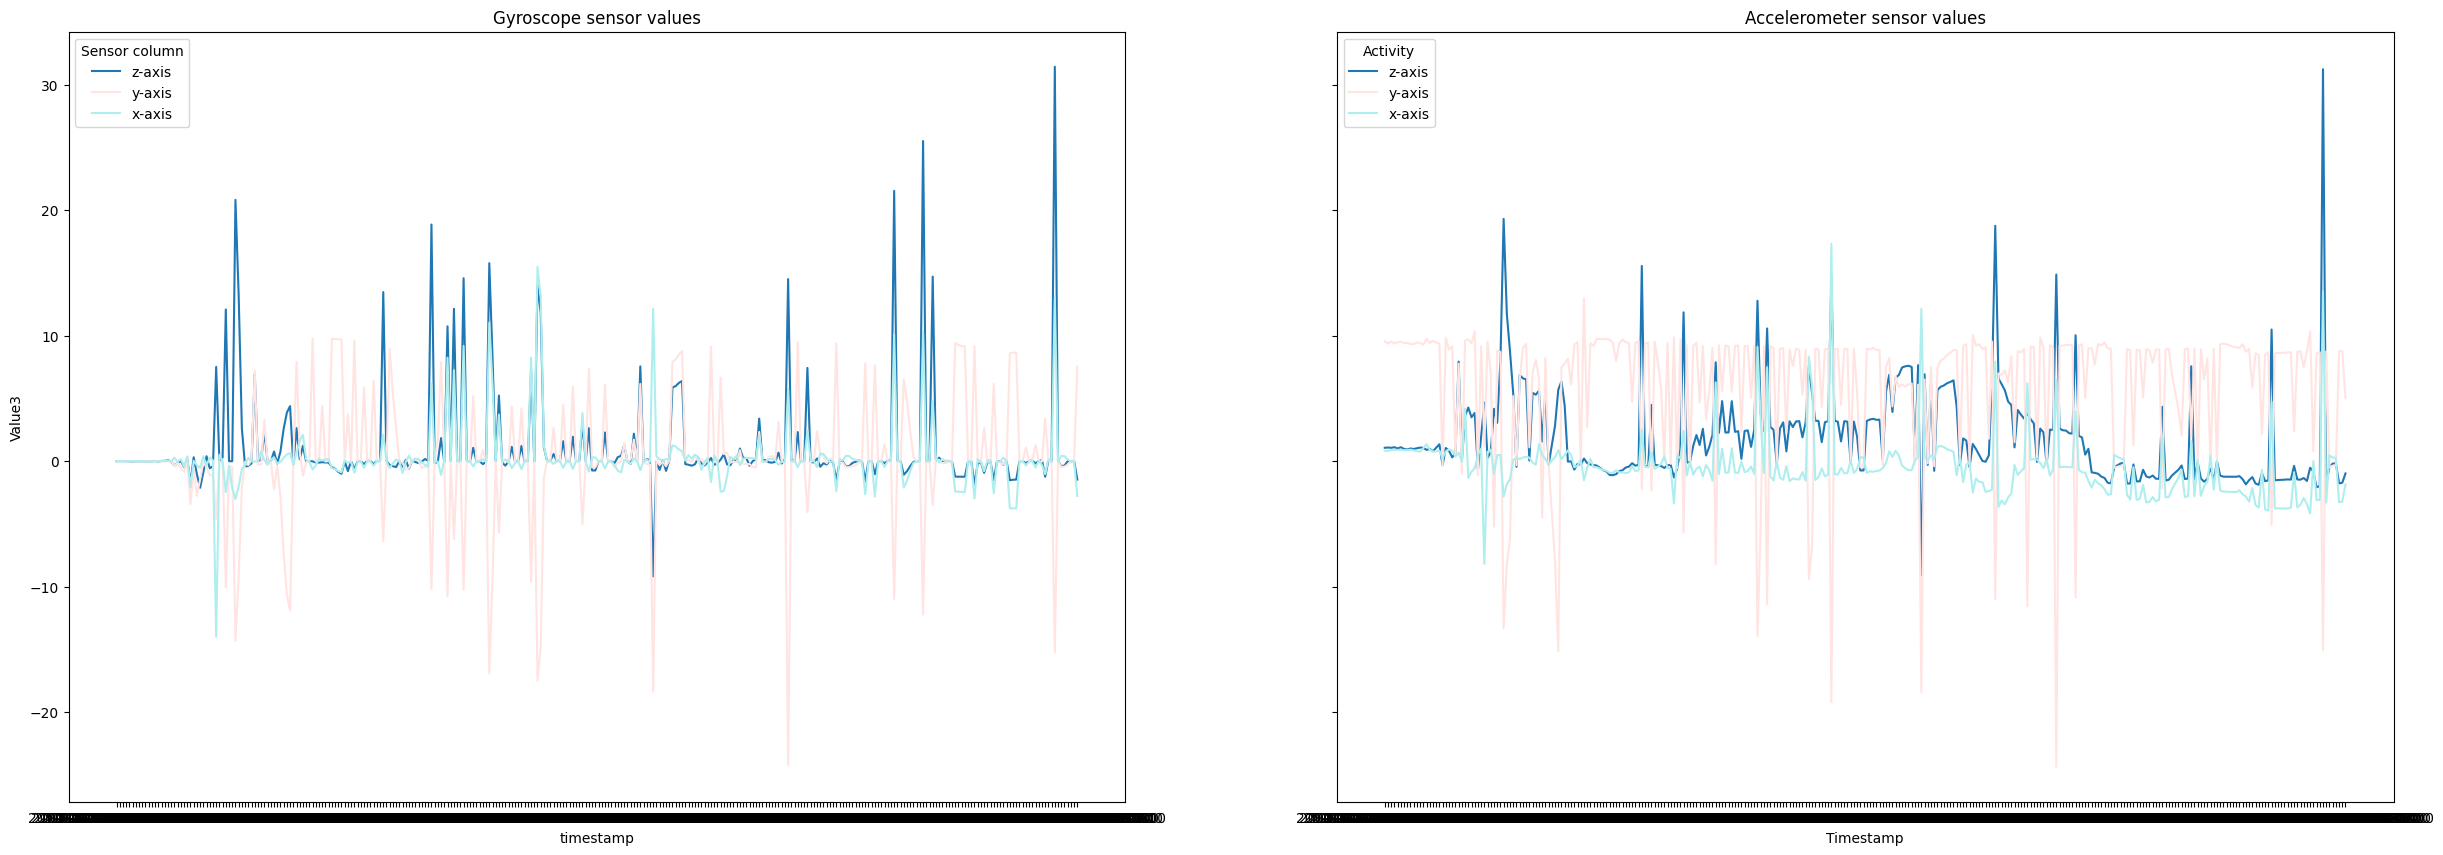

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 8))

fig, axs = plt.subplots(1, 2, figsize=(30, 10), sharex='all', sharey='all')

# 300 rows = 60s interval
for activity in gyro_data.iloc[:300, :]['Activity'].unique():
    activity_data = gyro_data.iloc[:300, :][gyro_data.iloc[:300, :]['Activity'] == activity]
    
    sns.lineplot(x='timestamp', y='Value3', data=activity_data, ax=axs[0], label='z-axis')
    sns.lineplot(x='timestamp', y='Value2', data=activity_data, color = '#FFE4E1', ax = axs[0], label='y-axis')
    sns.lineplot(x='timestamp', y='Value1', data=activity_data, color = '#AFEEEE', ax = axs[0], label='x-axis')
    axs[0].set_title('Gyroscope sensor values')

    accel_activity_data = accel_data.iloc[:300, :][accel_data.iloc[:300, :]['Activity'] == activity]
    sns.lineplot(x='timestamp', y='Value3', data=accel_activity_data, ax=axs[1], label='z-axis')
    sns.lineplot(x='timestamp', y='Value2', data=accel_activity_data, color = '#FFE4E1', ax = axs[1], label='y-axis')
    sns.lineplot(x='timestamp', y='Value1', data=accel_activity_data, color = '#AFEEEE', ax = axs[1], label='x-axis')
    axs[1].set_title('Accelerometer sensor values')

for ax in axs:
    ax.legend(title='Sensor column')
plt.xlabel("Timestamp")
plt.ylabel("Sensor Values")

plt.legend(title="Activity")
plt.show()


<Figure size 1300x800 with 0 Axes>

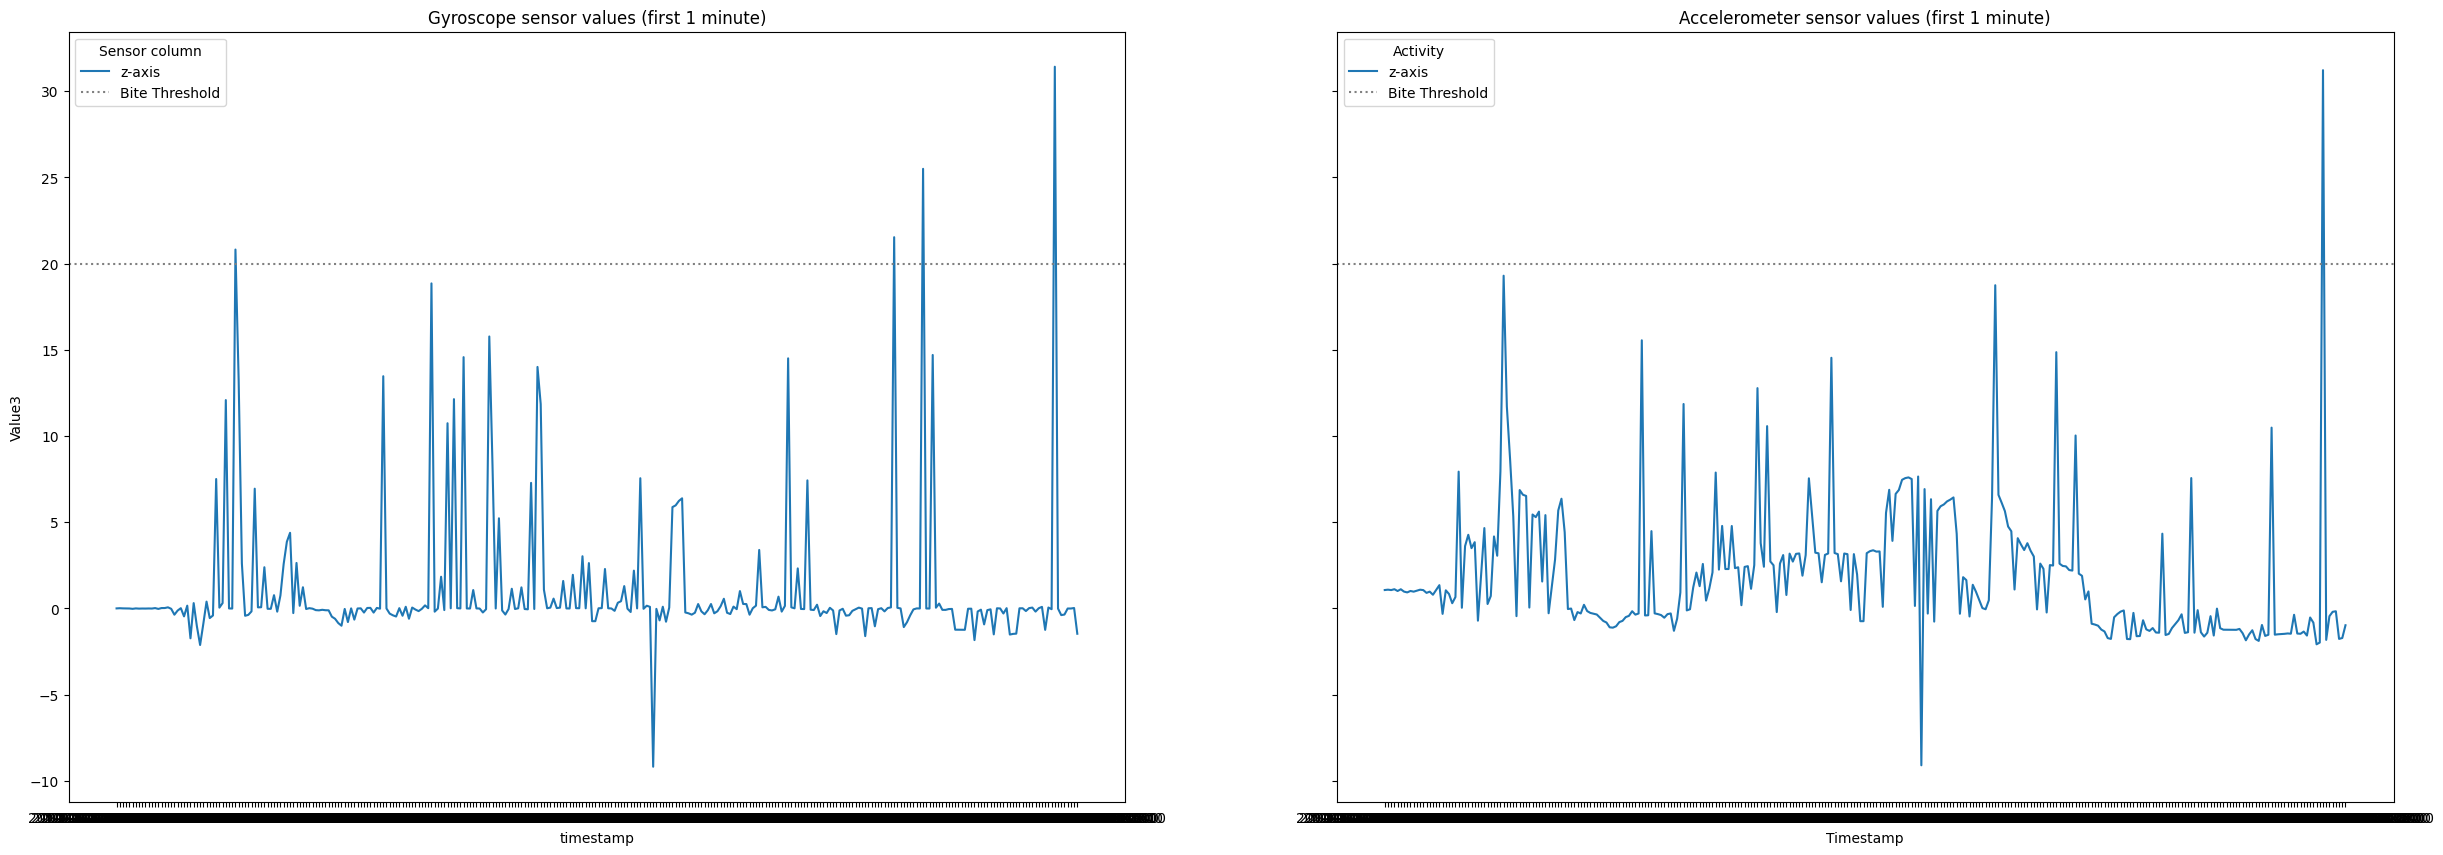

In [26]:
# only z axis value seems relevant
plt.figure(figsize=(13, 8))

fig, axs = plt.subplots(1, 2, figsize=(30, 10), sharex='all', sharey='all')

# 300 rows = 60s interval
for activity in gyro_data.iloc[:300, :]['Activity'].unique():
    activity_data = gyro_data.iloc[:300, :][gyro_data.iloc[:300, :]['Activity'] == activity]
    
    sns.lineplot(x='timestamp', y='Value3', data=activity_data, ax=axs[0], label='z-axis')
    axs[0].axhline(y=20, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')

    axs[0].set_title('Gyroscope sensor values (first 1 minute)')

    accel_activity_data = accel_data.iloc[:300, :][accel_data.iloc[:300, :]['Activity'] == activity]
    sns.lineplot(x='timestamp', y='Value3', data=accel_activity_data, ax=axs[1], label='z-axis')
    axs[1].axhline(y=20, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')

    axs[1].set_title('Accelerometer sensor values (first 1 minute)')

for ax in axs:
    ax.legend(title='Sensor column')
plt.xlabel("Timestamp")
plt.ylabel("Sensor Values")

plt.legend(title="Activity")
plt.show()


<Figure size 1300x800 with 0 Axes>

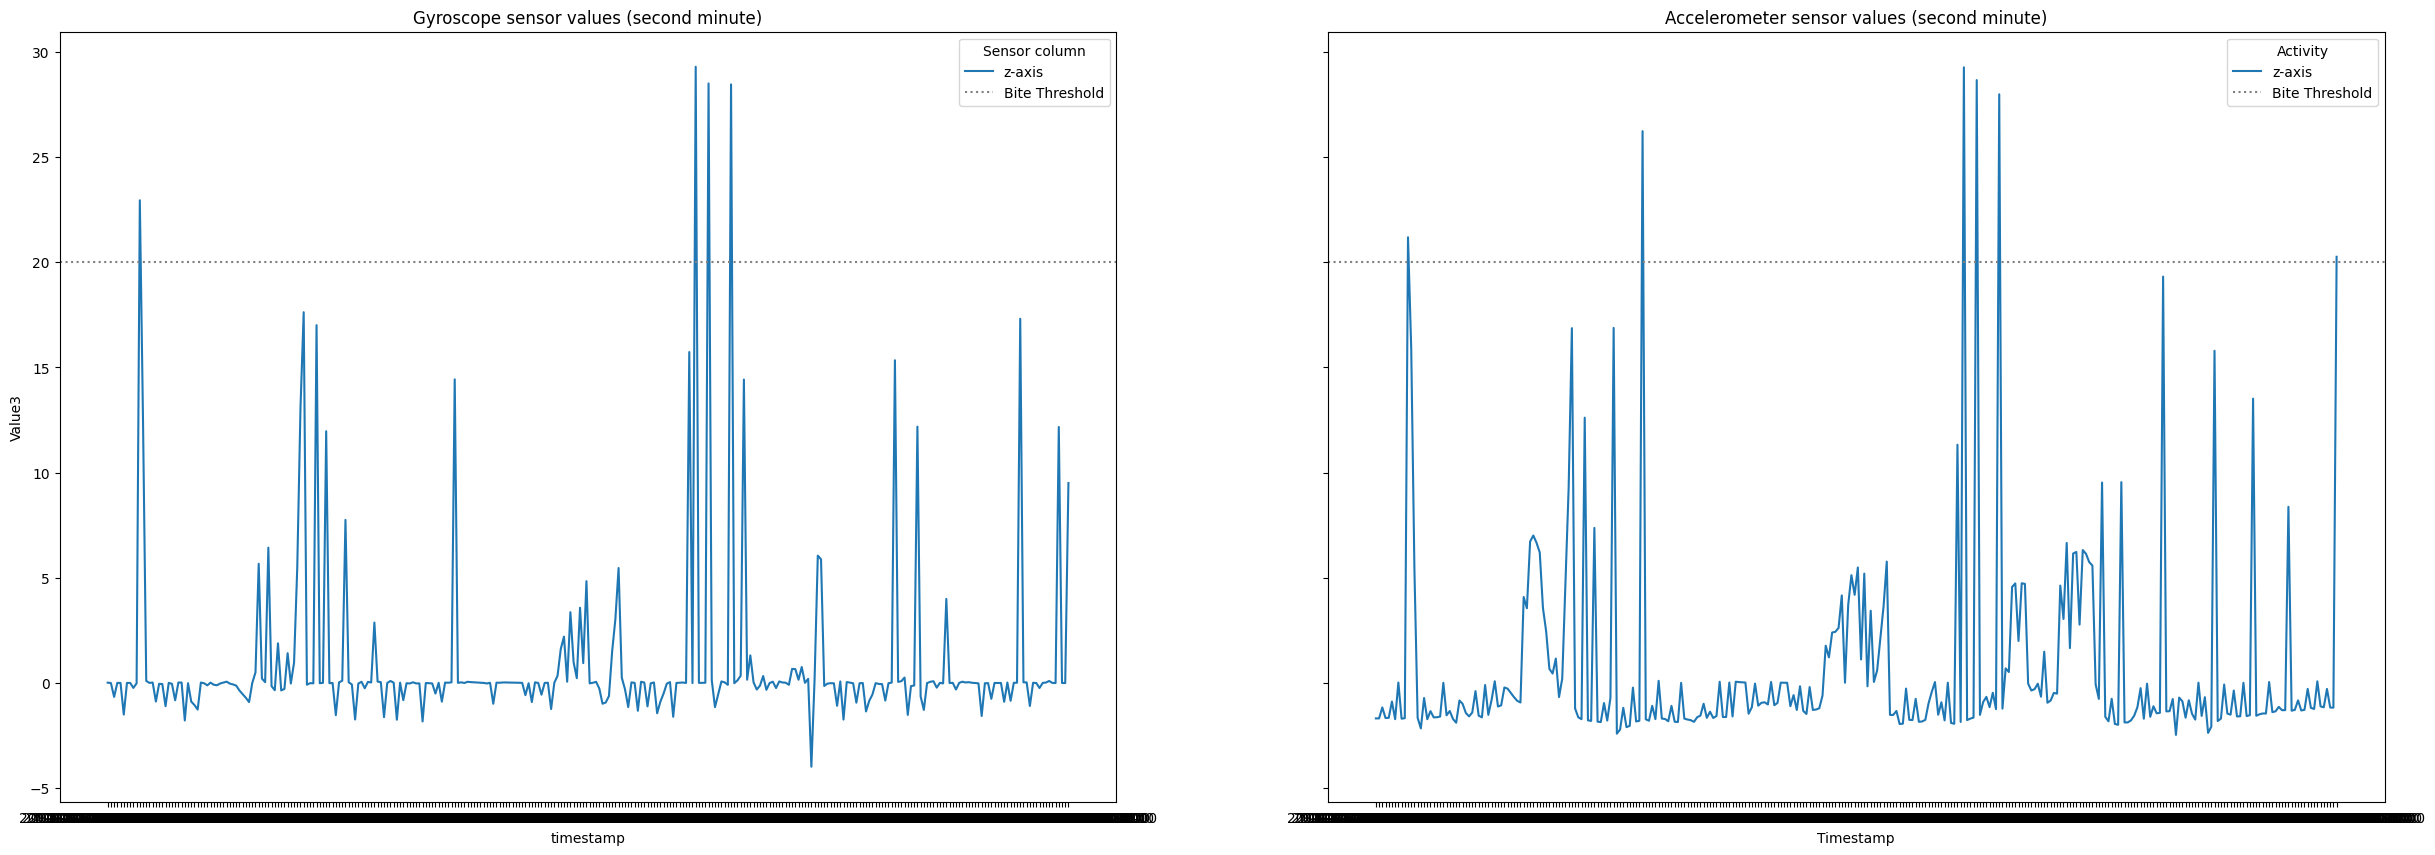

In [27]:
# only z axis value seems relevant
plt.figure(figsize=(13, 8))

fig, axs = plt.subplots(1, 2, figsize=(30, 10), sharex='all', sharey='all')

# 300 rows = 60s interval
for activity in gyro_data.iloc[300:600, :]['Activity'].unique():
    activity_data = gyro_data.iloc[300:600, :][gyro_data.iloc[300:600, :]['Activity'] == activity]
    
    sns.lineplot(x='timestamp', y='Value3', data=activity_data, ax=axs[0], label='z-axis')
    axs[0].axhline(y=20, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
    axs[0].set_title('Gyroscope sensor values (second minute)')

    accel_activity_data = accel_data.iloc[300:600, :][accel_data.iloc[300:600, :]['Activity'] == activity]
    sns.lineplot(x='timestamp', y='Value3', data=accel_activity_data, ax=axs[1], label='z-axis')
    axs[1].axhline(y=20, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
    axs[1].set_title('Accelerometer sensor values (second minute)')

for ax in axs:
    ax.legend(title='Sensor column')
plt.xlabel("Timestamp")
plt.ylabel("Sensor Values")

plt.legend(title="Activity")
plt.show()

<Figure size 1300x800 with 0 Axes>

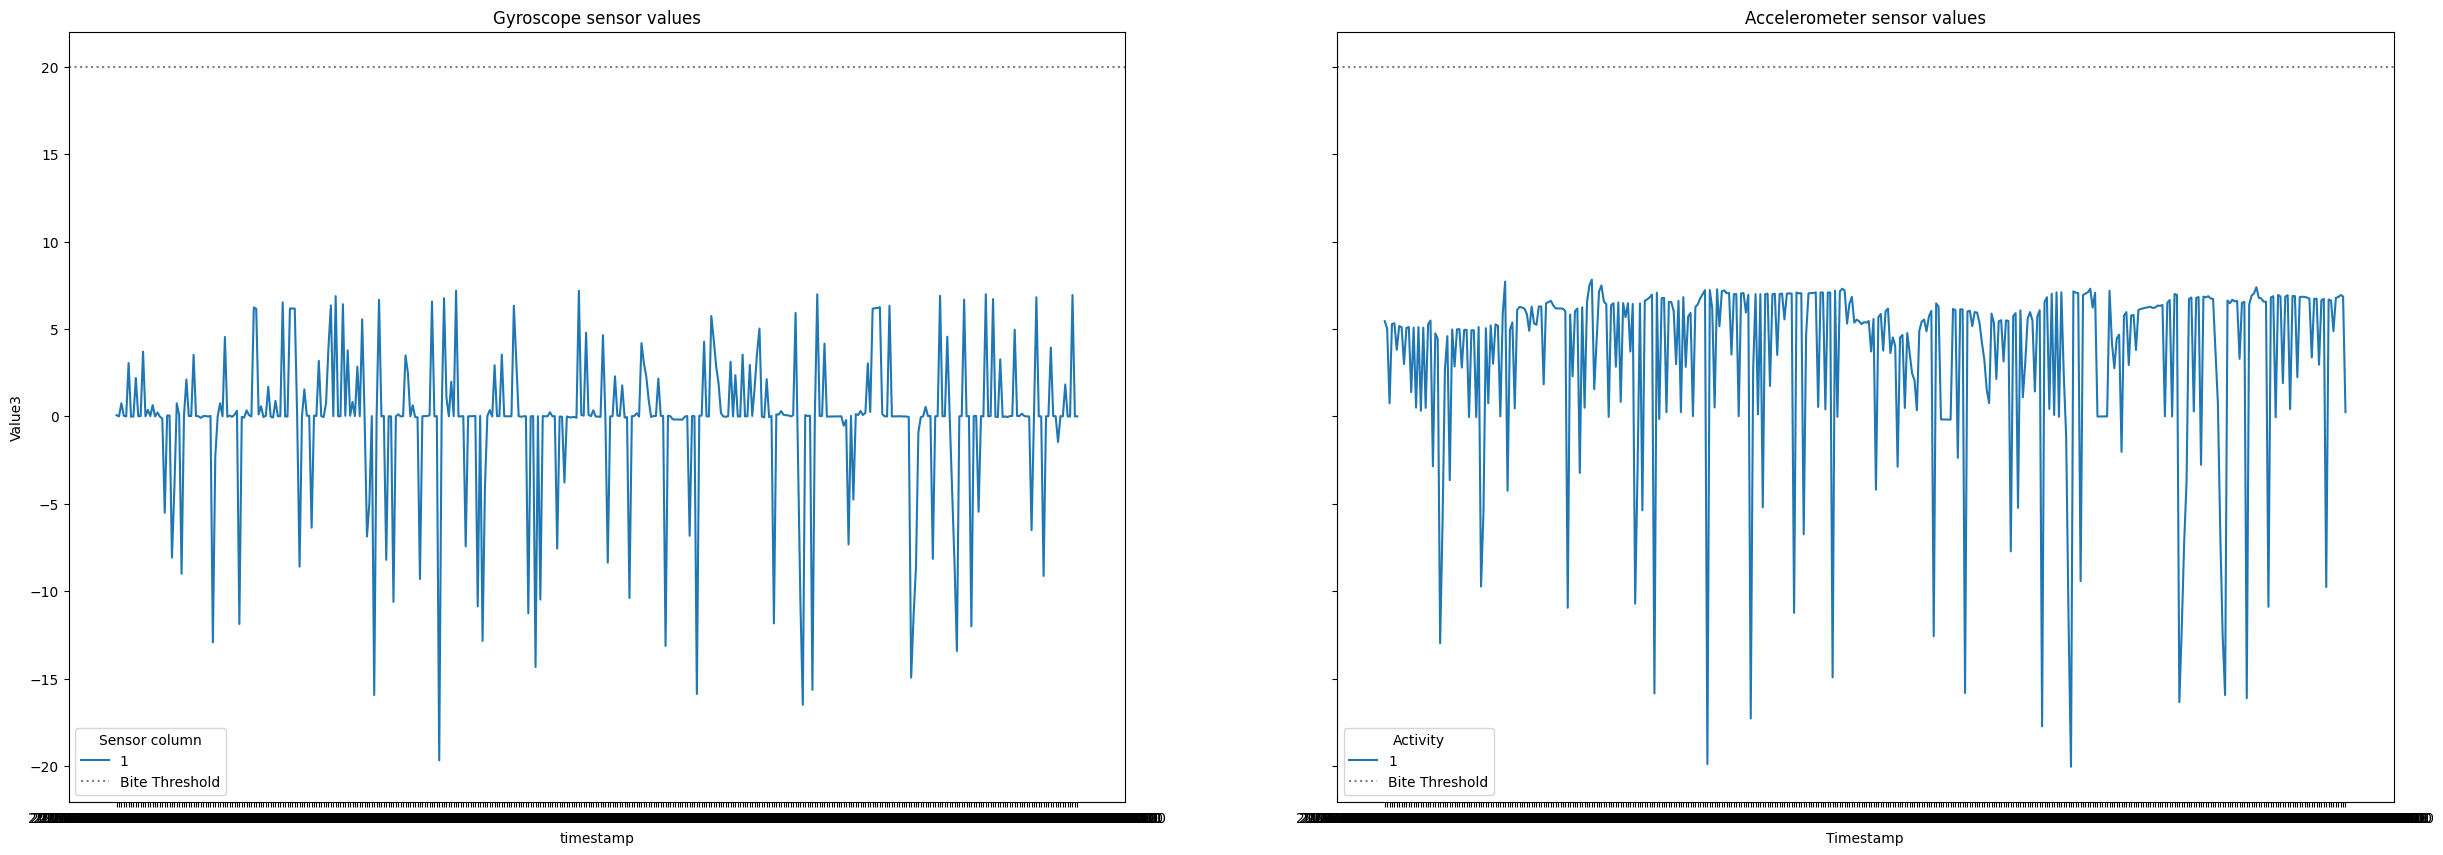

In [33]:
# only z axis value seems relevant
plt.figure(figsize=(13, 8))

fig, axs = plt.subplots(1, 2, figsize=(30, 10), sharex='all', sharey='all')

# 300 rows = 60s interval
for activity in gyro_data.iloc[10500:10900, :]['Activity'].unique():
    activity_data = gyro_data.iloc[10500:10900, :][gyro_data.iloc[10500:10900, :]['Activity'] == activity]
    
    sns.lineplot(x='timestamp', y='Value3', data=activity_data, ax=axs[0], label=activity)
    axs[0].axhline(y=20, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
    axs[0].set_title('Gyroscope sensor values')

    accel_activity_data = accel_data.iloc[10500:10900, :][accel_data.iloc[10500:10900, :]['Activity'] == activity]
    sns.lineplot(x='timestamp', y='Value3', data=accel_activity_data, ax=axs[1], label=activity)
    axs[1].axhline(y=20, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
    axs[1].set_title('Accelerometer sensor values')

for ax in axs:
    ax.legend(title='Sensor column')
plt.xlabel("Timestamp")
plt.ylabel("Sensor Values")

plt.legend(title="Activity")
plt.show()

<Figure size 1300x800 with 0 Axes>

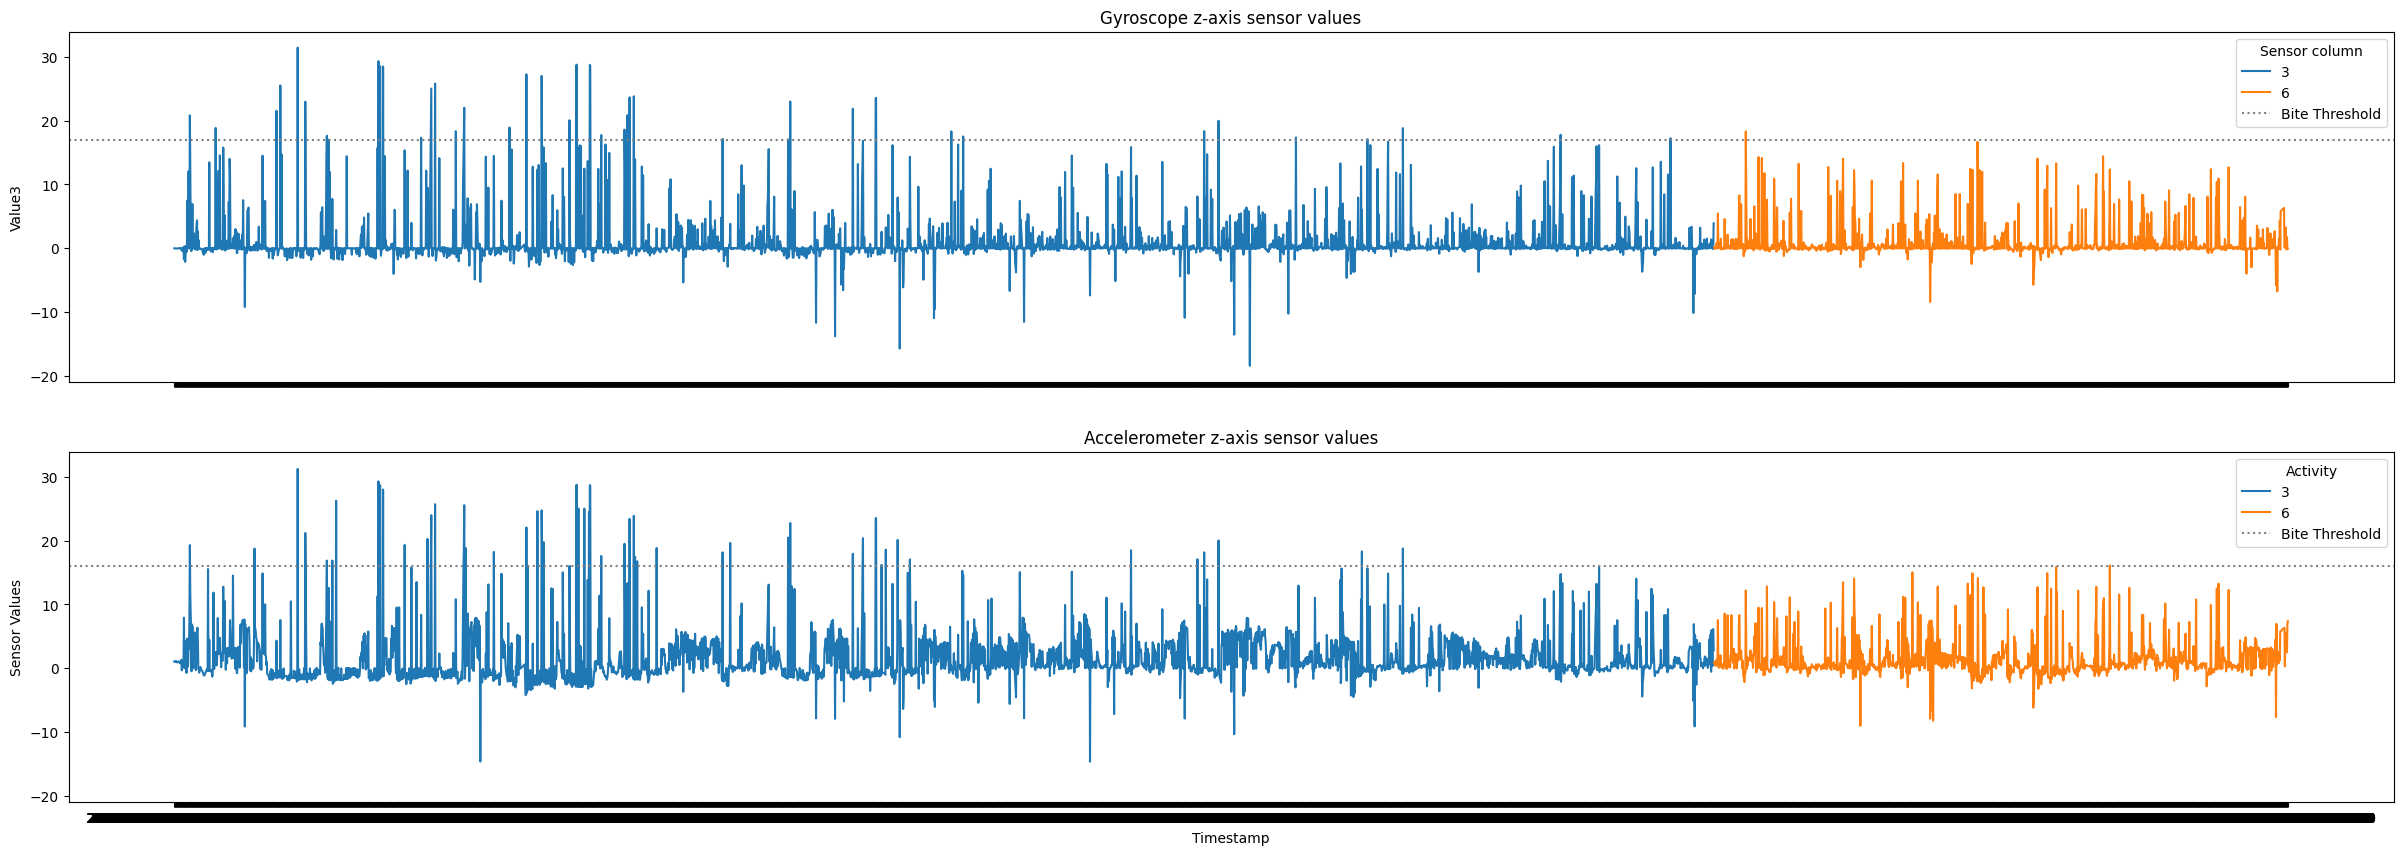

In [17]:
# only z axis value seems relevant
plt.figure(figsize=(13, 8))

fig, axs = plt.subplots(2, 1, figsize=(30, 10), sharex='all', sharey='all')

# 300 rows = 60s interval
for activity in gyro_data.iloc[:5000, :]['Activity'].unique():
    activity_data = gyro_data.iloc[:5000, :][gyro_data.iloc[:5000, :]['Activity'] == activity]
    
    sns.lineplot(x='timestamp', y='Value3', data=activity_data, ax=axs[0], label=activity)
    
    axs[0].set_title('Gyroscope z-axis sensor values')

    accel_activity_data = accel_data.iloc[:5000, :][accel_data.iloc[:5000, :]['Activity'] == activity]
    sns.lineplot(x='timestamp', y='Value3', data=accel_activity_data, ax=axs[1], label=activity)
    
    axs[1].set_title('Accelerometer z-axis sensor values')

axs[0].axhline(y=17, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
axs[1].axhline(y=16, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
for ax in axs:
    ax.legend(title='Sensor column')
plt.xlabel("Timestamp")
plt.ylabel("Sensor Values")

plt.legend(title="Activity")
plt.show()

In [11]:
len(gyro_data)

1379528

<Figure size 1300x800 with 0 Axes>

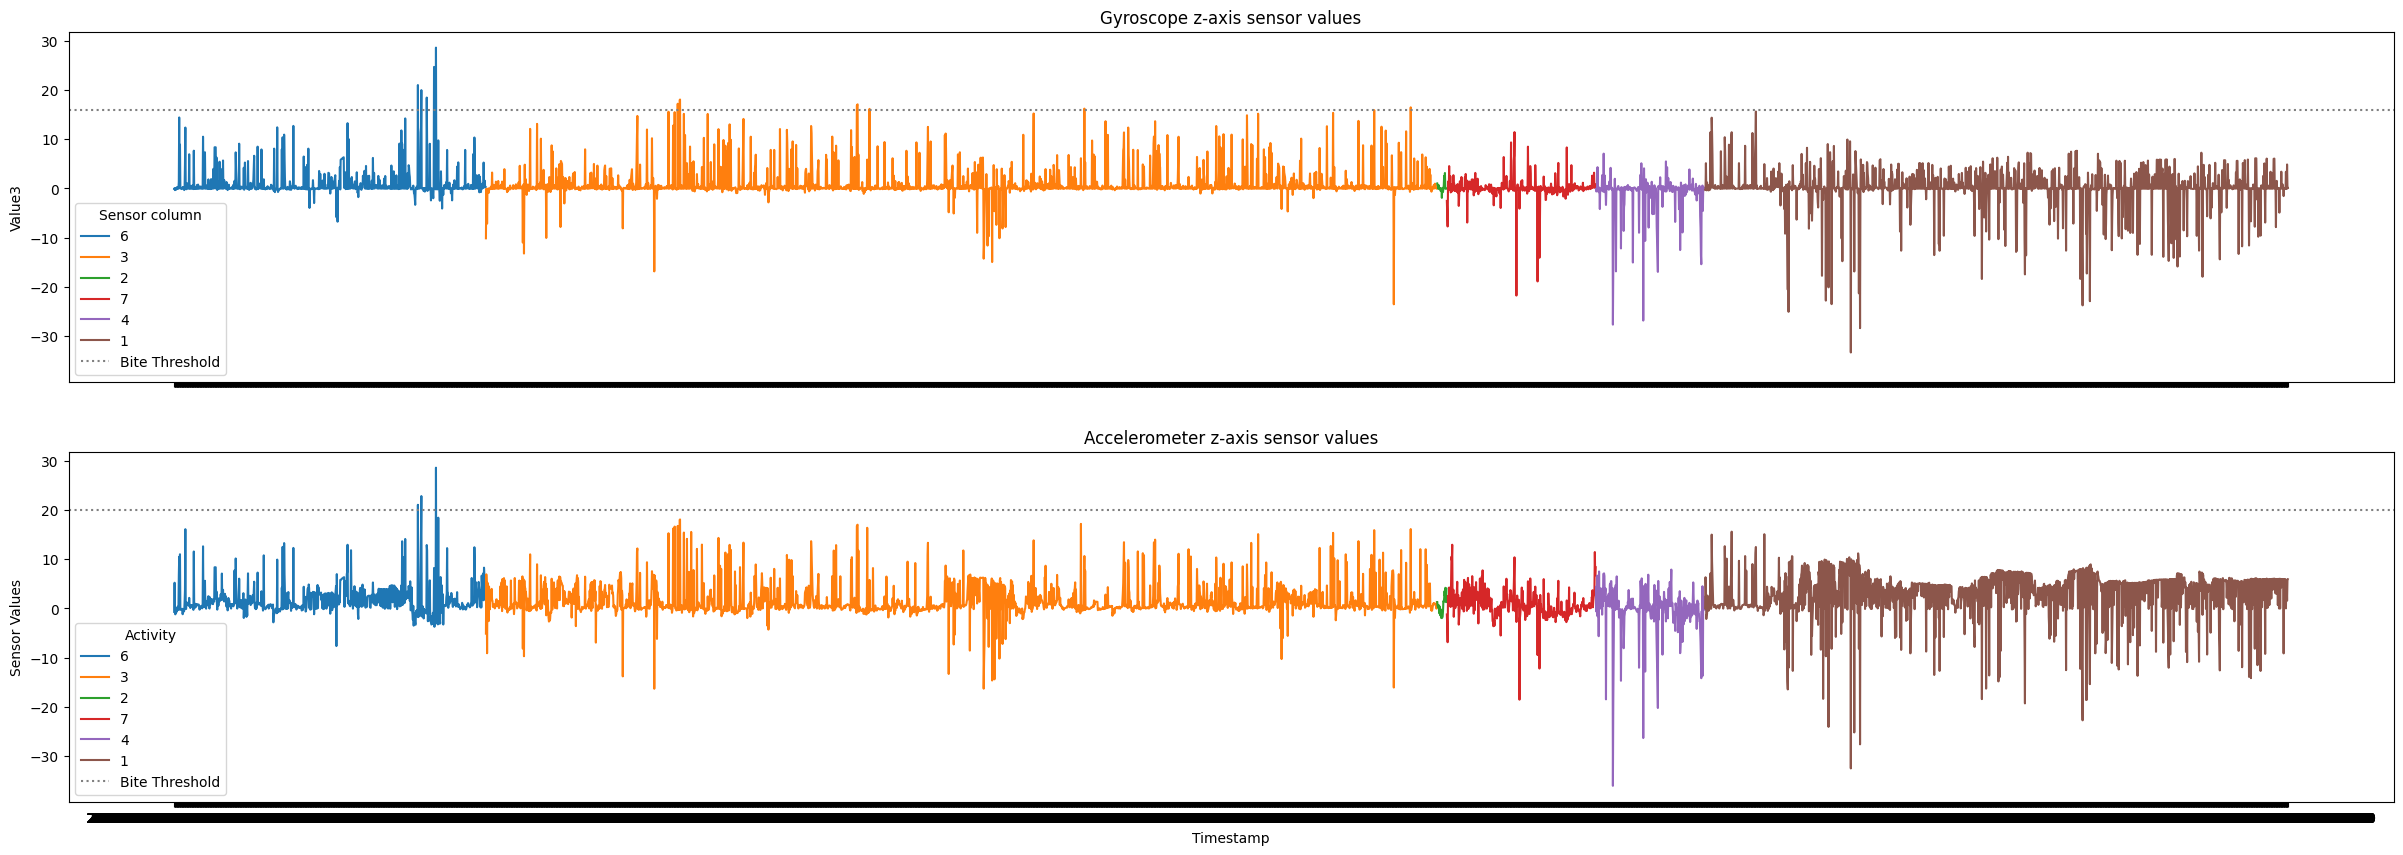

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
# only z axis value seems relevant
plt.figure(figsize=(13, 8))

fig, axs = plt.subplots(2, 1, figsize=(30, 10), sharex='all', sharey='all')

# 300 rows = 60s interval
for activity in gyro_data.iloc[4500:10000, :]['Activity'].unique():
    activity_data = gyro_data.iloc[4500:10000, :][gyro_data.iloc[4500:10000, :]['Activity'] == activity]
    
    sns.lineplot(x='timestamp', y='Value3', data=activity_data, ax=axs[0], label=activity)
    
    axs[0].set_title('Gyroscope z-axis sensor values')

    accel_activity_data = accel_data.iloc[4500:10000, :][accel_data.iloc[4500:10000, :]['Activity'] == activity]
    sns.lineplot(x='timestamp', y='Value3', data=accel_activity_data, ax=axs[1], label=activity)
    
    axs[1].set_title('Accelerometer z-axis sensor values')

axs[0].axhline(y=16, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
axs[1].axhline(y=20, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
for ax in axs:
    ax.legend(title='Sensor column')
plt.xlabel("Timestamp")
plt.ylabel("Sensor Values")

plt.legend(title="Activity")
plt.show()

<Figure size 1300x800 with 0 Axes>

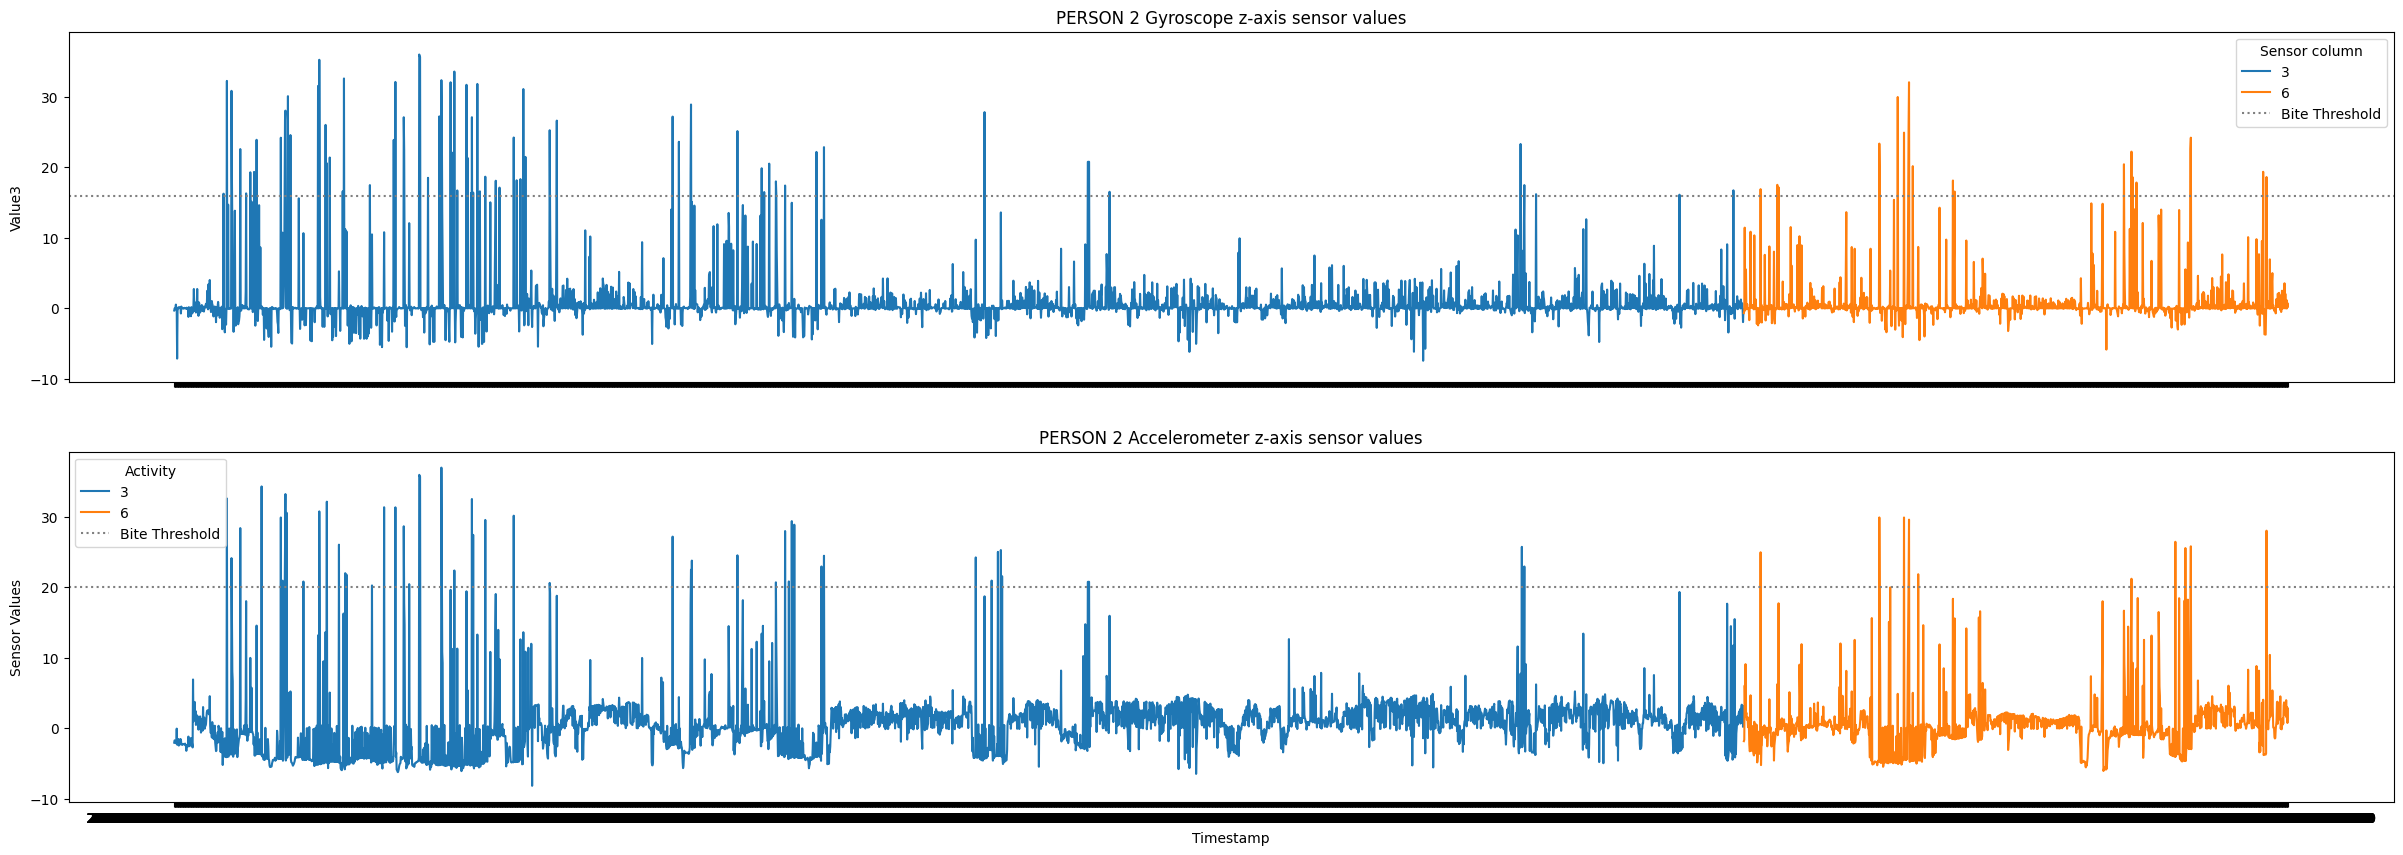

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
# only z axis value seems relevant
plt.figure(figsize=(13, 8))

fig, axs = plt.subplots(2, 1, figsize=(30, 10), sharex='all', sharey='all')

# 300 rows = 60s interval
for activity in gyro_data.iloc[36944:42000, :]['Activity'].unique():
    activity_data = gyro_data.iloc[36944:42000, :][gyro_data.iloc[36944:42000, :]['Activity'] == activity]
    
    sns.lineplot(x='timestamp', y='Value3', data=activity_data, ax=axs[0], label=activity)
    
    axs[0].set_title('PERSON 2 Gyroscope z-axis sensor values')

    accel_activity_data = accel_data.iloc[36944:42000, :][accel_data.iloc[36944:42000, :]['Activity'] == activity]
    sns.lineplot(x='timestamp', y='Value3', data=accel_activity_data, ax=axs[1], label=activity)
    
    axs[1].set_title('PERSON 2 Accelerometer z-axis sensor values')

axs[0].axhline(y=16, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
axs[1].axhline(y=20, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
for ax in axs:
    ax.legend(title='Sensor column')
plt.xlabel("Timestamp")
plt.ylabel("Sensor Values")

plt.legend(title="Activity")
plt.show()

<Figure size 1300x800 with 0 Axes>

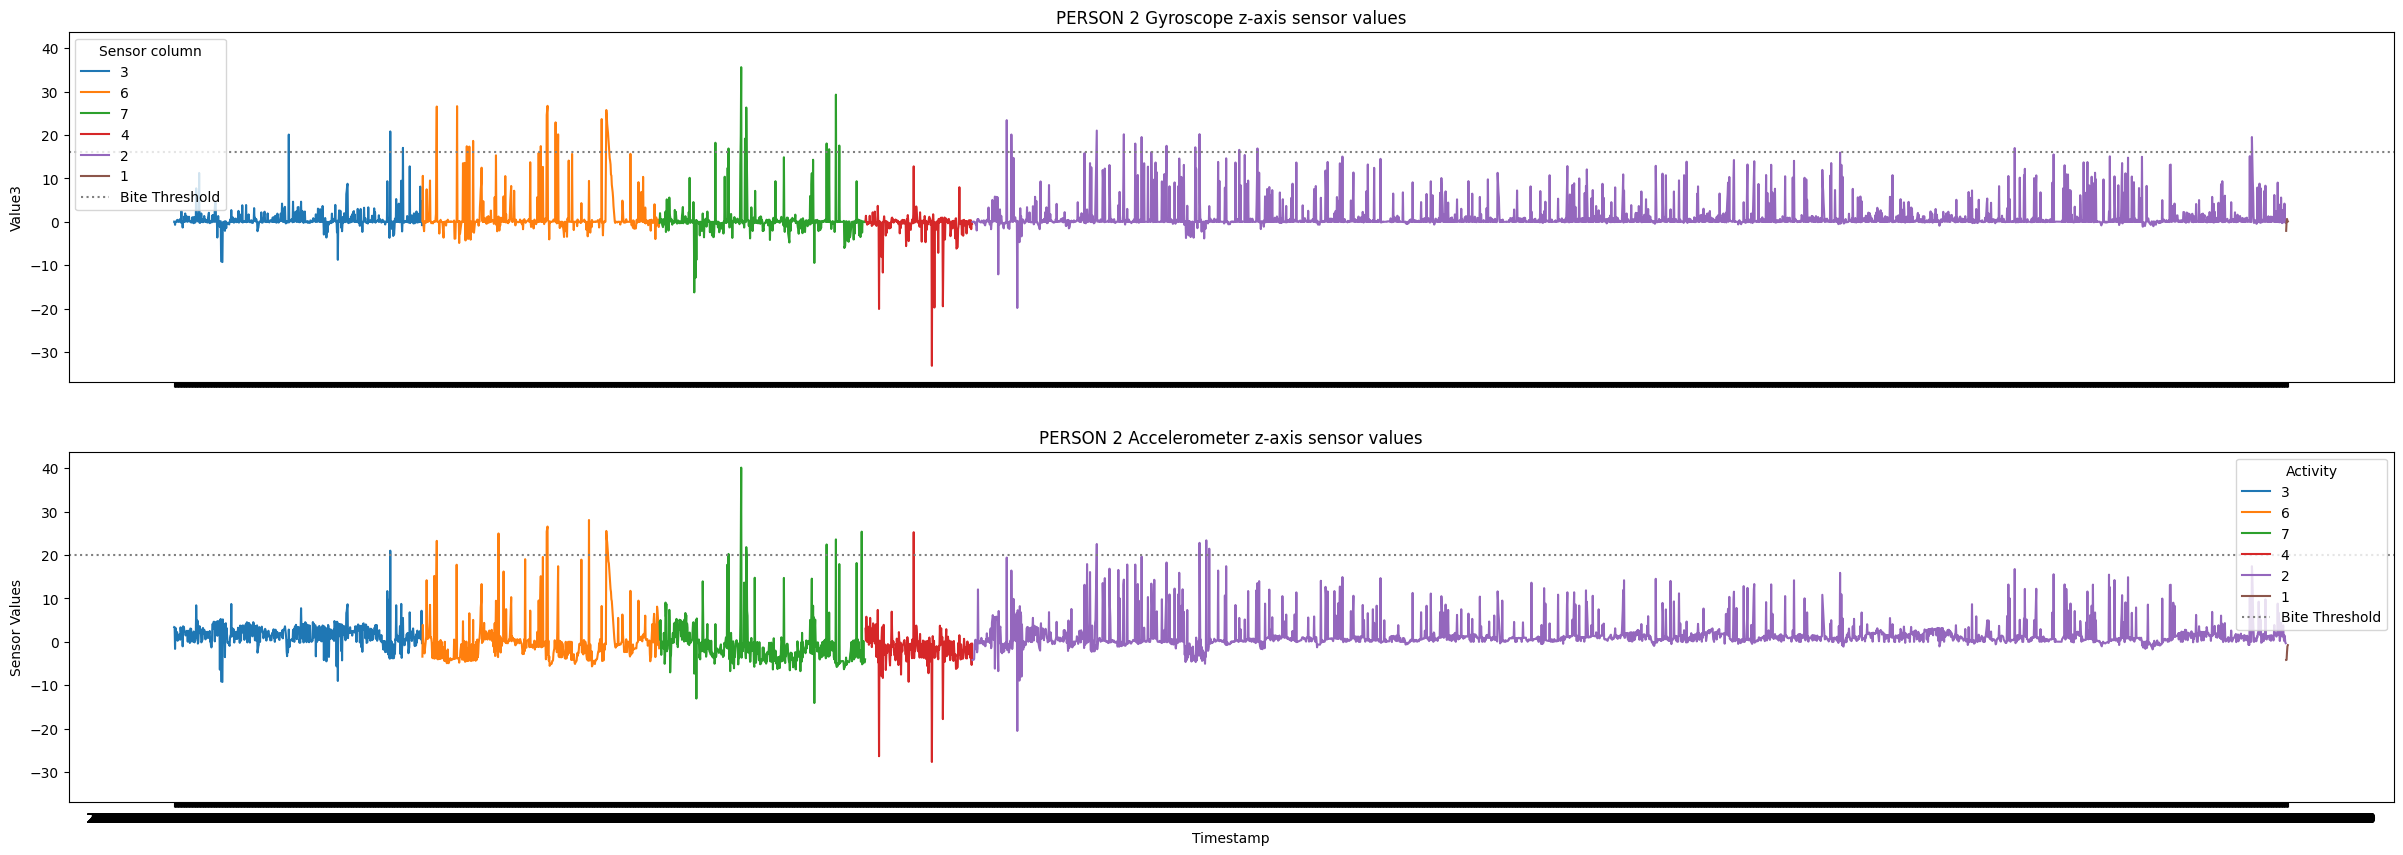

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
# only z axis value seems relevant
plt.figure(figsize=(13, 8))

fig, axs = plt.subplots(2, 1, figsize=(30, 10), sharex='all', sharey='all')

# 300 rows = 60s interval
for activity in gyro_data.iloc[42000:47000, :]['Activity'].unique():
    activity_data = gyro_data.iloc[42000:47000, :][gyro_data.iloc[42000:47000, :]['Activity'] == activity]
    
    sns.lineplot(x='timestamp', y='Value3', data=activity_data, ax=axs[0], label=activity)
    
    axs[0].set_title('PERSON 2 Gyroscope z-axis sensor values')

    accel_activity_data = accel_data.iloc[42000:47000, :][accel_data.iloc[42000:47000, :]['Activity'] == activity]
    sns.lineplot(x='timestamp', y='Value3', data=accel_activity_data, ax=axs[1], label=activity)
    
    axs[1].set_title('PERSON 2 Accelerometer z-axis sensor values')

axs[0].axhline(y=16, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
axs[1].axhline(y=20, color='gray', linestyle=':', linewidth=1.5, label=f'Bite Threshold')
for ax in axs:
    ax.legend(title='Sensor column')
plt.xlabel("Timestamp")
plt.ylabel("Sensor Values")

plt.legend(title="Activity")
plt.show()

In [ ]:
len(gyro_data)
# print(gyro_data['Activity'])

1379528

In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import butter, filtfilt
gyro_data_eat = gyro_data[gyro_data['Activity'] == 3]
accel_data_eat = accel_data[accel_data['Activity'] == 3]
# print(len(gyro_data_eat))
# Butterworth Filter to smooth sensor data
def butter_lowpass_filter(data, cutoff=3, fs=50, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Preprocess the data (smoothing, normalizing, and segmenting)
def preprocess_sensor_data(df, window_size=50, step_size=25):
    # Apply the low-pass filter
    df['x_filtered'] = butter_lowpass_filter(df['Value1'])
    df['y_filtered'] = butter_lowpass_filter(df['Value2'])
    df['z_filtered'] = butter_lowpass_filter(df['Value3'])
    
    # Normalize
    for col in ['x_filtered', 'y_filtered', 'z_filtered']:
        df[col] = (df[col] - df[col].mean()) / df[col].std()
    
    # Segment the data into windows for model input
    segments = []
    for i in range(0, len(df) - window_size, step_size):
        segment = df[['x_filtered', 'y_filtered', 'z_filtered']].iloc[i:i + window_size].values
        segments.append(segment)
    
    return np.array(segments)

# Sample usage with gyro and accel data
gyro_segments = preprocess_sensor_data(gyro_data_eat)
accel_segments = preprocess_sensor_data(accel_data_eat)


C:\Users\rohan\AppData\Local\Temp\ipykernel_14076\2513906350.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_filtered'] = butter_lowpass_filter(df['Value1'])
C:\Users\rohan\AppData\Local\Temp\ipykernel_14076\2513906350.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_filtered'] = butter_lowpass_filter(df['Value2'])
C:\Users\rohan\AppData\Local\Temp\ipykernel_14076\2513906350.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [ ]:
print("Shape of gyro_segments:", gyro_segments.shape)
labels = np.array(labels).flatten()
print("Shape of labels:", labels.shape)

Shape of gyro_segments: (8367, 50, 3)
Shape of labels: (9177,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the main gesture detection model
def build_model(input_shape):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        MaxPooling1D(pool_size=2),
        Conv1D(128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(50, return_sequences=False),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification for eating vs non-eating
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the model
model = build_model(input_shape=(50, 3))
model.fit(gyro_segments, labels, epochs=10, validation_split=0.2, batch_size=32)


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

## PLOTS

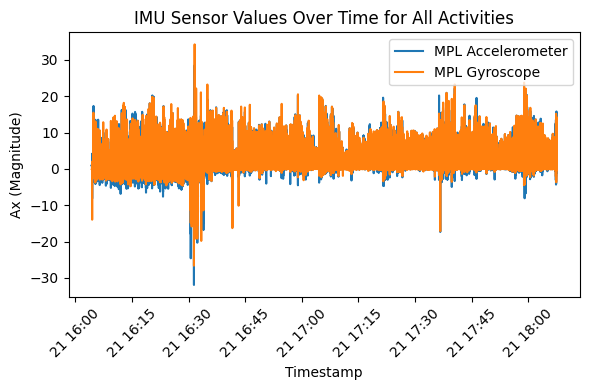

In [ ]:
# Separate the data based on the type of IMU sensors
imu_sensors = ['MPL Accelerometer', 'MPL Gyroscope']

# Filter the sensor data for IMU sensors only
imu_data = sensor_data_aligned[sensor_data_aligned['Sensor'].isin(imu_sensors)]

# Plot time series for all activities (for each sensor and its values)
plt.figure(figsize=(6, 4))

for sensor in imu_sensors:
    plt.plot(imu_data[imu_data['Sensor'] == sensor]['timestamp'], 
             imu_data[imu_data['Sensor'] == sensor]['Value1'], label=sensor)

plt.xlabel('Timestamp')
plt.ylabel('Ax (Magnitude)')
plt.title('IMU Sensor Values Over Time for All Activities')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


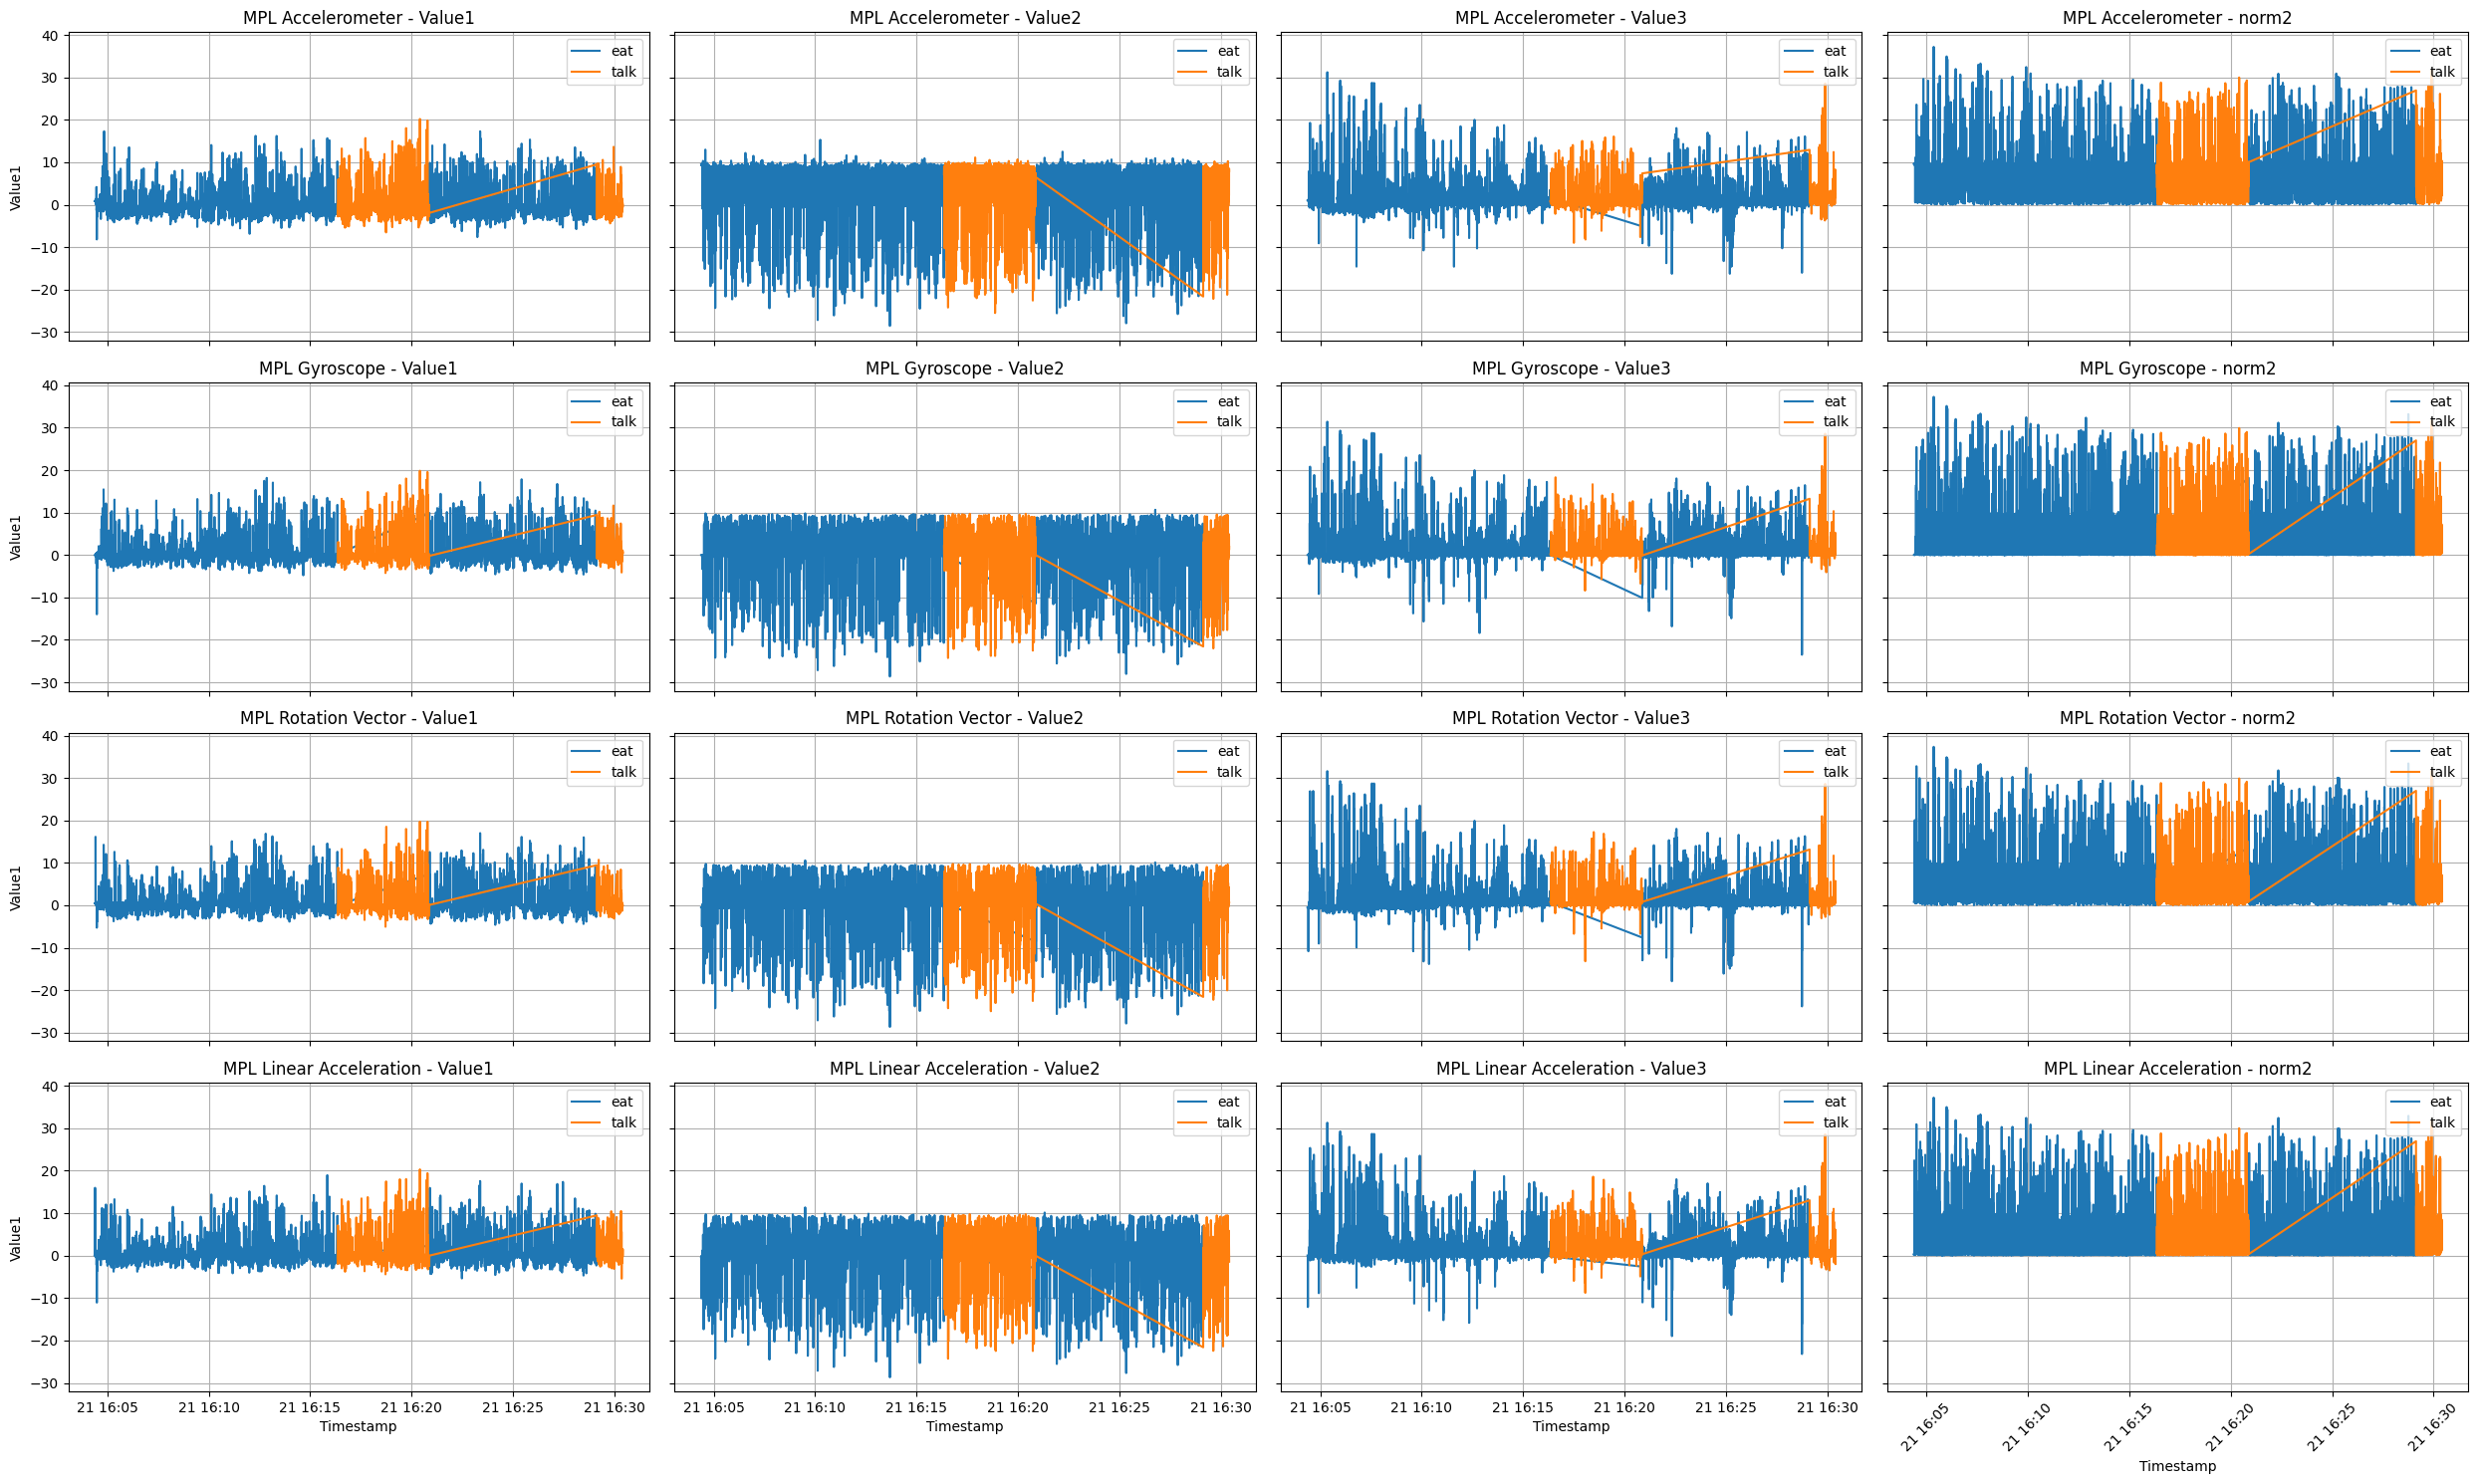

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the timestamp column is in datetime format if not already
sensor_data_aligned['timestamp'] = pd.to_datetime(sensor_data_aligned['timestamp'])

# Separate the data based on the type of IMU sensors
imu_sensors = ['MPL Accelerometer', 'MPL Gyroscope', 'MPL Rotation Vector', 'MPL Linear Acceleration']
value_columns = ['Value1', 'Value2', 'Value3', 'norm2']
activities = ['eat','talk']
# Filter the sensor data for IMU sensors only
imu_data = sensor_data_aligned[sensor_data_aligned['Sensor'].isin(imu_sensors)]
imu_data = imu_data[imu_data['Activity'].isin(activities)]
# Create subplots for each sensor and value type
fig, axs = plt.subplots(len(imu_sensors), len(value_columns), figsize=(25, 15), sharex='all', sharey='all')

for i, sensor in enumerate(imu_sensors):
    sensor_data = imu_data[imu_data['Sensor'] == sensor]
    
    for j, value_col in enumerate(value_columns):
        # Plot data with activity labels for each value column
        for activity in sensor_data['Activity'].unique():
            activity_data = sensor_data[sensor_data['Activity'] == activity]
            axs[i, j].plot(activity_data['timestamp'], activity_data[value_col], label=activity)
        
        axs[i, j].set_title(f'{sensor} - {value_col}')
        axs[i, j].grid(True)
        if i == len(imu_sensors) - 1:
            axs[i, j].set_xlabel('Timestamp')
        if j == 0:
            axs[i, j].set_ylabel(value_col)
        axs[i, j].legend(loc='upper right')
# Adjust layout
# plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


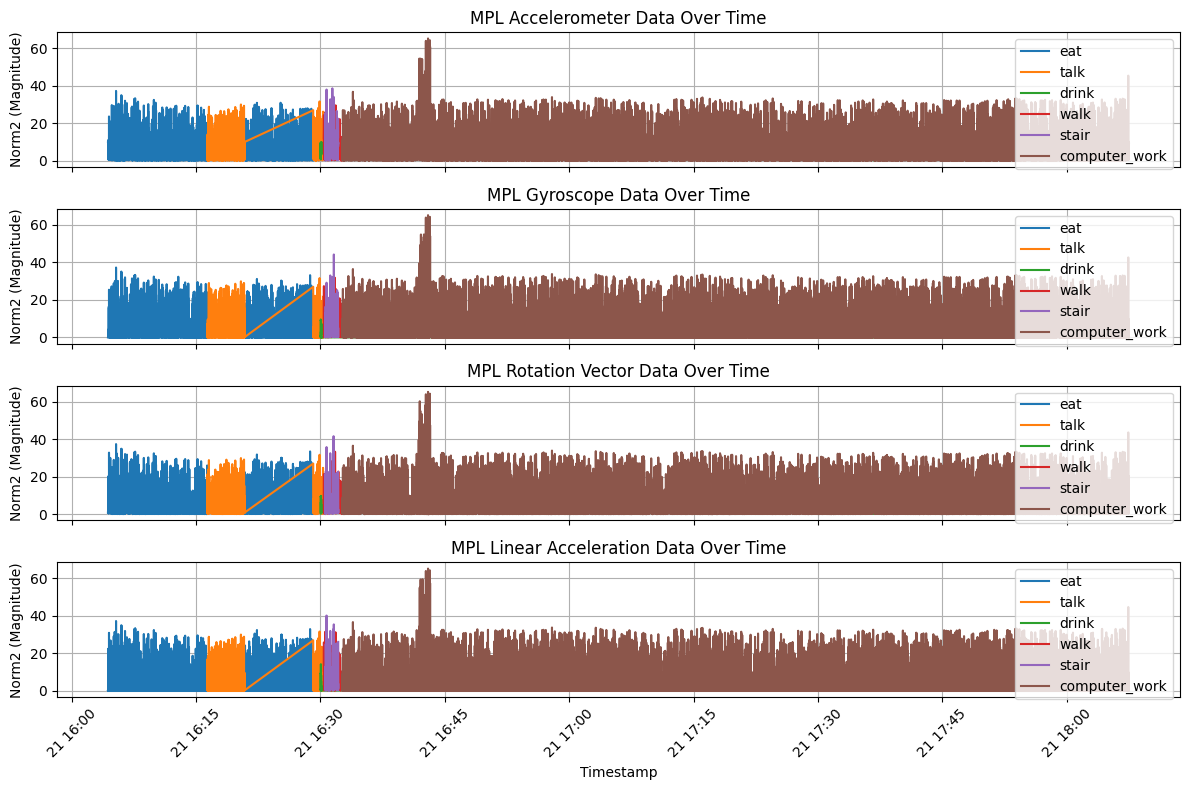

In [ ]:
""" Visualizing activity distributuion for person 1 using IMU data (accelerometer and gyroscope) """

# Ensure the timestamp column is in datetime format if not already
sensor_data_aligned['timestamp'] = pd.to_datetime(sensor_data_aligned['timestamp'])

# Separate the data based on the type of IMU sensors
imu_sensors = ['MPL Accelerometer', 'MPL Gyroscope', 'MPL Rotation Vector', 'MPL Linear Acceleration']

# Filter the sensor data for IMU sensors only
imu_data = sensor_data_aligned[sensor_data_aligned['Sensor'].isin(imu_sensors)]

# Create subplots for each sensor
fig, axs = plt.subplots(len(imu_sensors), 1, figsize=(12, 8), sharex=True)

for i, sensor in enumerate(imu_sensors):
    # Filter data for the current sensor
    sensor_data = imu_data[imu_data['Sensor'] == sensor]
    
    # Plot data with activity labels
    for activity in sensor_data['Activity'].unique():
        activity_data = sensor_data[sensor_data['Activity'] == activity]
        axs[i].plot(activity_data['timestamp'], activity_data['norm2'], label=activity)
    
    axs[i].set_ylabel('Norm2 (Magnitude)')
    axs[i].set_title(f'{sensor} Data Over Time')
    axs[i].legend(loc='upper right')
    axs[i].grid(True)

axs[-1].set_xlabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


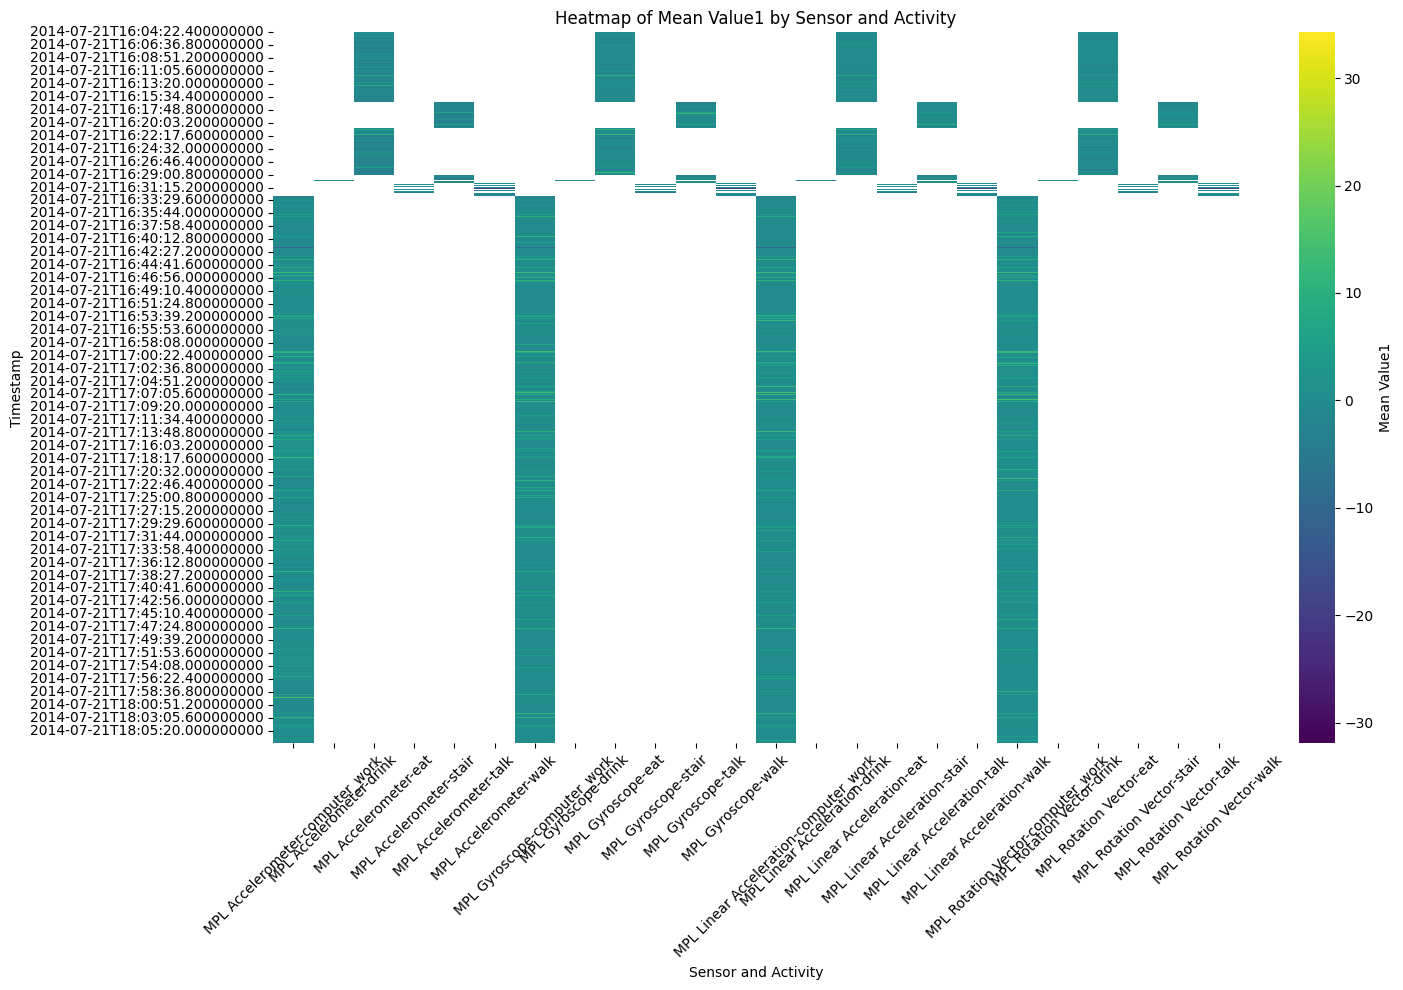

In [ ]:
import seaborn as sns

# Pivot the data for heatmap
heatmap_data = imu_data.pivot_table(index='timestamp', columns=['Sensor', 'Activity'], values='Value1', aggfunc='mean')

plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', cbar_kws={'label': 'Mean Value1'})
plt.title('Heatmap of Mean Value1 by Sensor and Activity')
plt.xlabel('Sensor and Activity')
plt.ylabel('Timestamp')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


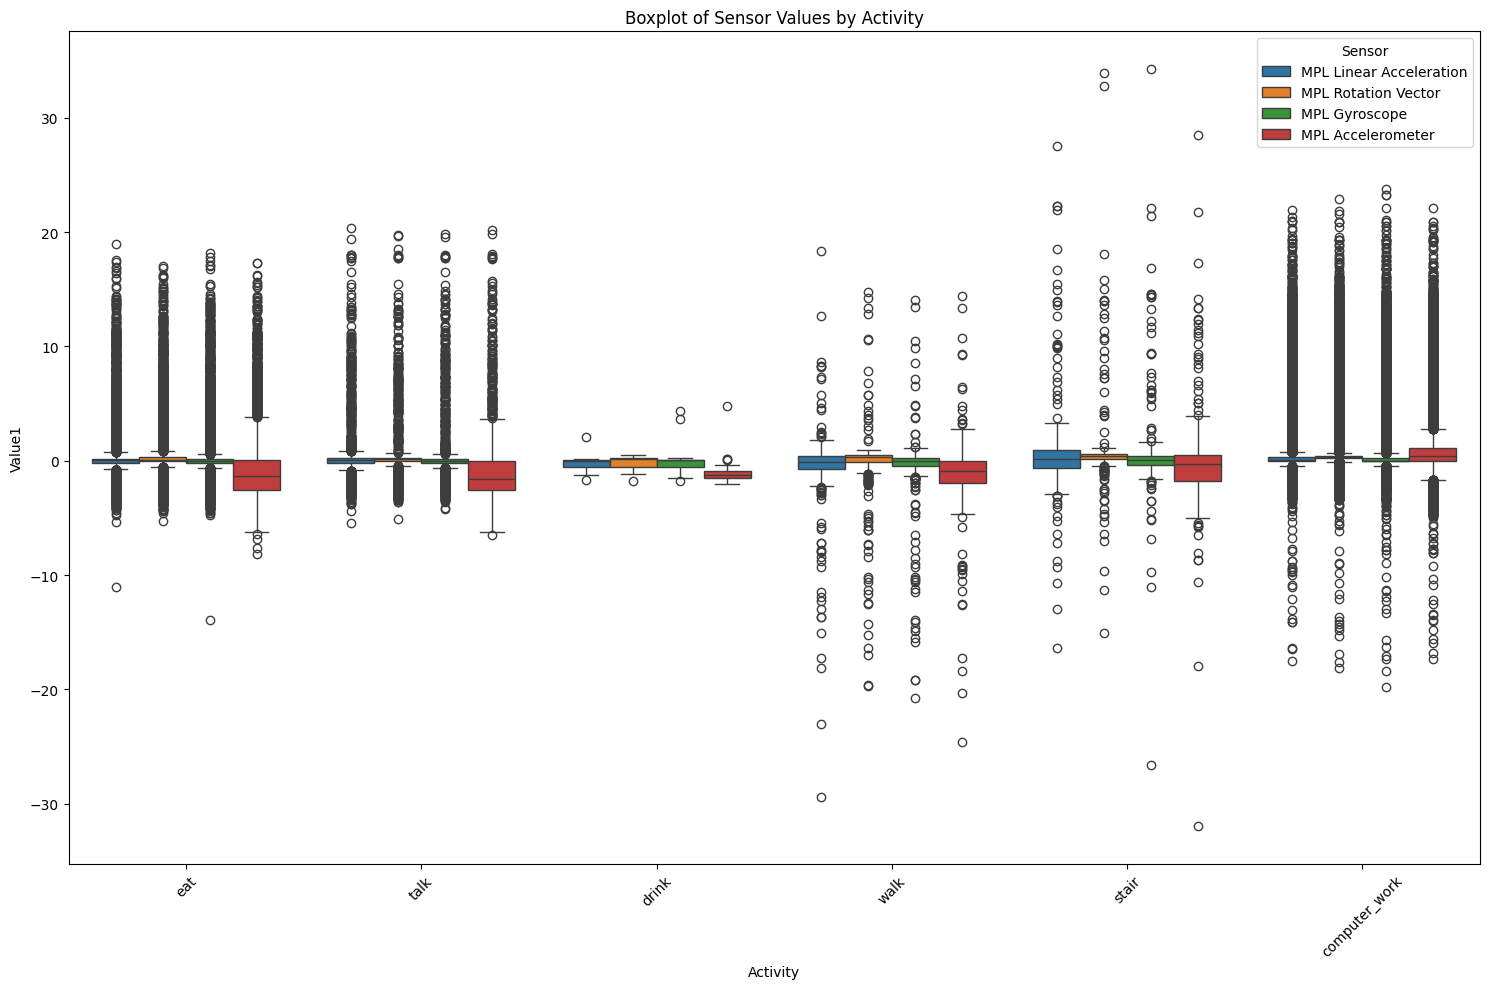

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='Activity', y='Value1', hue='Sensor', data=imu_data)
plt.title('Boxplot of Sensor Values by Activity')
plt.xlabel('Activity')
plt.ylabel('Value1')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


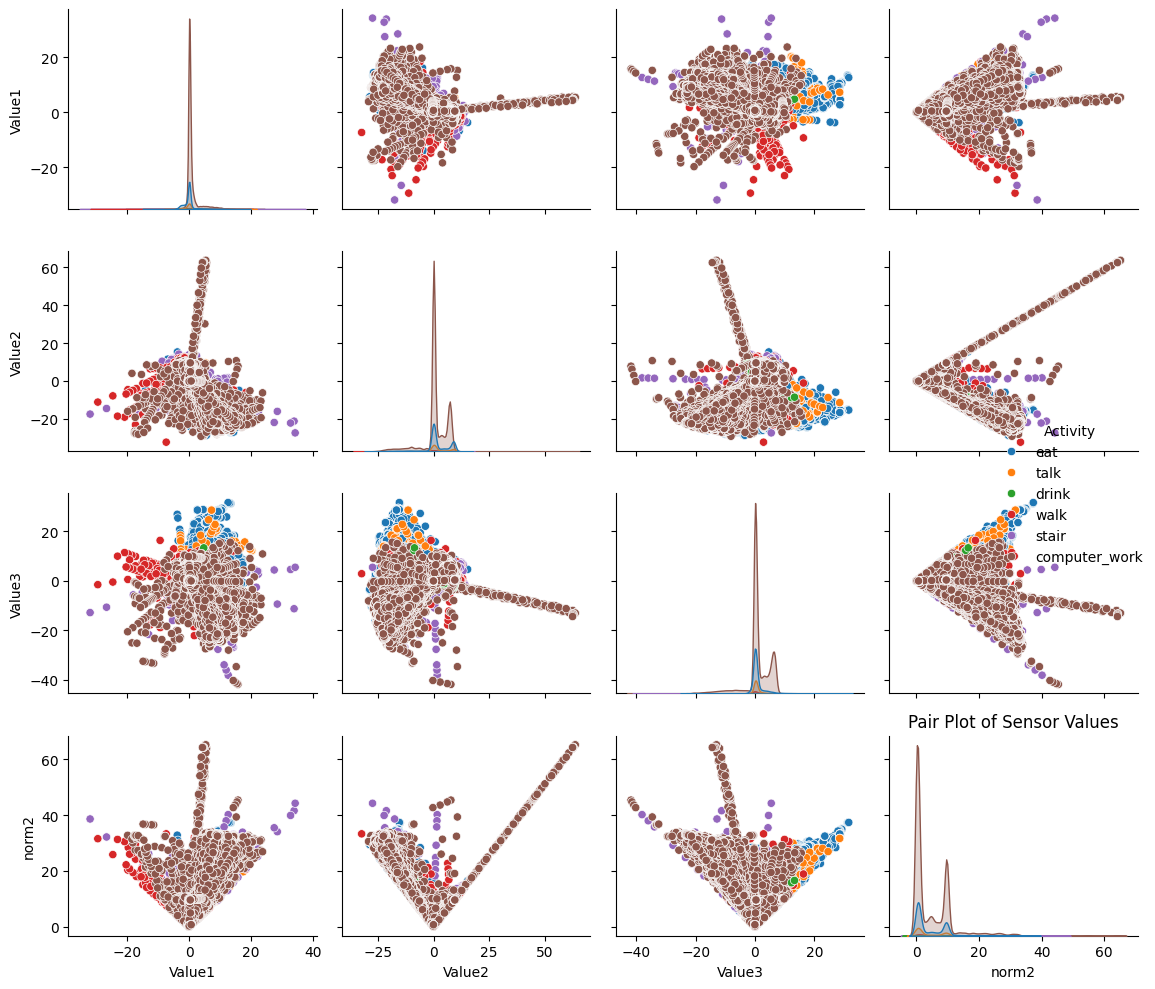

In [ ]:
sns.pairplot(imu_data, hue='Activity', vars=value_columns)
plt.title('Pair Plot of Sensor Values')
plt.tight_layout()
plt.show()


C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3775594325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_data[f'{value_col}_rolling'] = activity_data[value_col].rolling(window=rolling_window).mean()
C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3775594325.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  activity_data[f'{value_col}_rolling'] = activity_data[value_col].rolling(window=rolling_window).mean()
C:\Users\rohan\AppData\Local\Temp\ipykernel_9288\3775594325.py:12: SettingWithCo

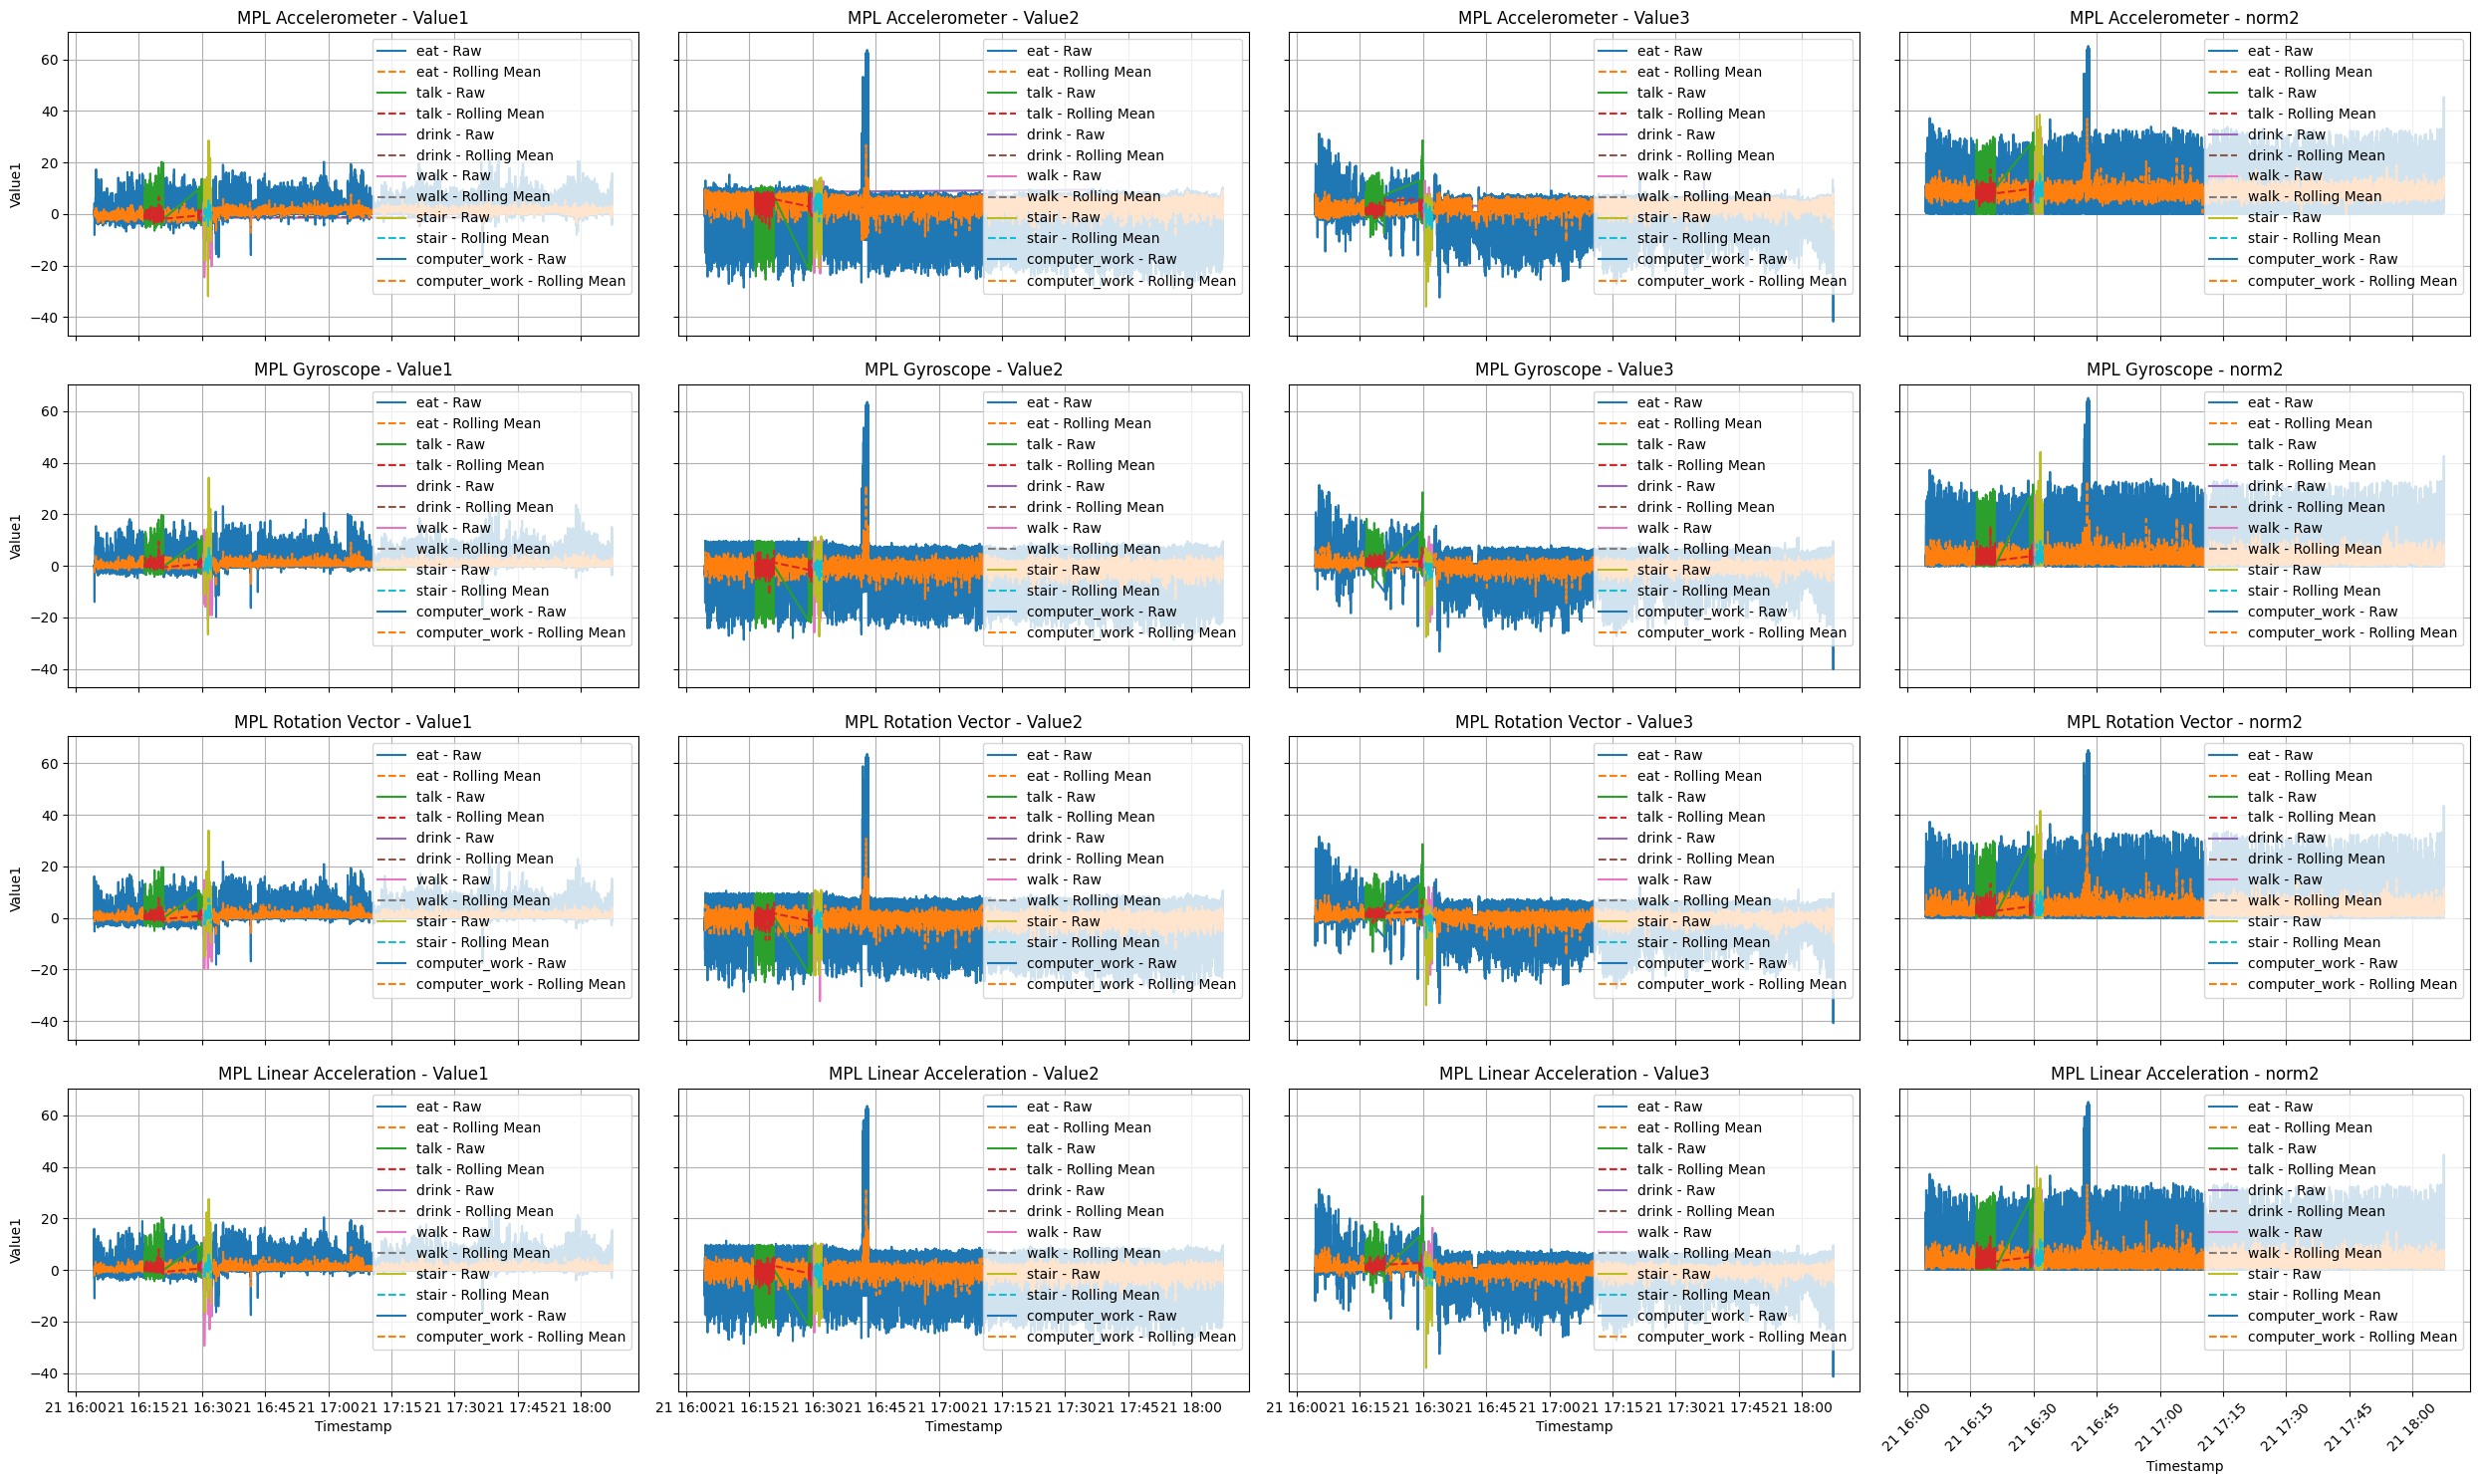

In [ ]:
rolling_window = 10  # Adjust window size as needed

fig, axs = plt.subplots(len(imu_sensors), len(value_columns), figsize=(25, 15), sharex='all', sharey='all')

for i, sensor in enumerate(imu_sensors):
    sensor_data = imu_data[imu_data['Sensor'] == sensor]
    
    for j, value_col in enumerate(value_columns):
        for activity in sensor_data['Activity'].unique():
            activity_data = sensor_data[sensor_data['Activity'] == activity]
            axs[i, j].plot(activity_data['timestamp'], activity_data[value_col], label=f'{activity} - Raw')
            activity_data[f'{value_col}_rolling'] = activity_data[value_col].rolling(window=rolling_window).mean()
            axs[i, j].plot(activity_data['timestamp'], activity_data[f'{value_col}_rolling'], label=f'{activity} - Rolling Mean', linestyle='--')
        
        axs[i, j].set_title(f'{sensor} - {value_col}')
        axs[i, j].grid(True)
        if i == len(imu_sensors) - 1:
            axs[i, j].set_xlabel('Timestamp')
        if j == 0:
            axs[i, j].set_ylabel(value_col)
        axs[i, j].legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'Activity' or 'Status' can be categorized
plt.figure(figsize=(12, 6))

# Scatter plot of Acceleration colored by Activity
scatter = plt.scatter(filtered_data['timestamp'], filtered_data['norm2'], 
                      c=filtered_data['Activity'].astype('category').cat.codes, 
                      cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity')

# Formatting
plt.xlabel('Timestamp')
plt.ylabel('Acceleration')
plt.title('Linear Acceleration Over Time Colored by Activity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend
# Show plot
plt.show()


# Graphs

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings

# Suppress FutureWarning for interpolation (optional)
warnings.filterwarnings("ignore", category=FutureWarning)

# Define numeric columns and window size
numeric_columns = ['Value1', 'Value2', 'Value3']

# Placeholder to store data from all participants
cumulative_dataset = pd.DataFrame()

# Loop through each participant's data (IDs 1101 to 1138)
for person_id in range(1101, 1139):
    try:
        # Load the CSV files for the current person
        annotations_path = f"./{person_id}/{person_id}_annotate.csv"
        sensor_data_path = f"./{person_id}/{person_id}_sensorData.csv"
        
        annotations = pd.read_csv(annotations_path)
        sensor_data = pd.read_csv(sensor_data_path)
        
        # Convert timestamps
        annotations['timestamp'] = pd.to_datetime(annotations['unix time'], unit='ms')
        sensor_data['timestamp'] = pd.to_datetime(sensor_data['Unix Time'], unit='ms')
        
        # Filter out unwanted sensor (Light sensor)
        sensor_data = sensor_data[sensor_data['Sensor'] != 'LTR-506ALS Light sensor']
        
        # Resample the sensor data to 200ms intervals
        sensor_data_resampled = (sensor_data
            .set_index('timestamp')
            .groupby('Sensor')[numeric_columns]
            .resample('200ms')
            .mean()
            .reset_index()
        )
        
        # Ensure numeric columns are properly typed before interpolation
        sensor_data_resampled[numeric_columns] = sensor_data_resampled[numeric_columns].apply(pd.to_numeric, errors='coerce')
        
        # Sort both DataFrames by timestamp
        sensor_data_resampled = sensor_data_resampled.sort_values('timestamp')
        annotations = annotations.sort_values('timestamp')
        
        # Merge sensor data with annotations using nearest merge
        sensor_data_aligned = pd.merge_asof(
            sensor_data_resampled, 
            annotations[['timestamp', 'Activity']],
            on='timestamp',
            direction='nearest'
        )
        
        # Add person_id to track the participant
        sensor_data_aligned['person_id'] = person_id
        
        # Interpolate missing sensor data to fill gaps
        sensor_data_aligned.interpolate(method='linear', inplace=True)
        
        # Append the current person's data to the cumulative dataset
        cumulative_dataset = pd.concat([cumulative_dataset, sensor_data_aligned], ignore_index=True)
        
    except FileNotFoundError as e:
        print(f"Data for person {person_id} not found, skipping...")



In [ ]:
cumulative_dataset.to_csv(r"./cumulative_sensor_data2.csv", index=False, header=True, encoding='utf-8')


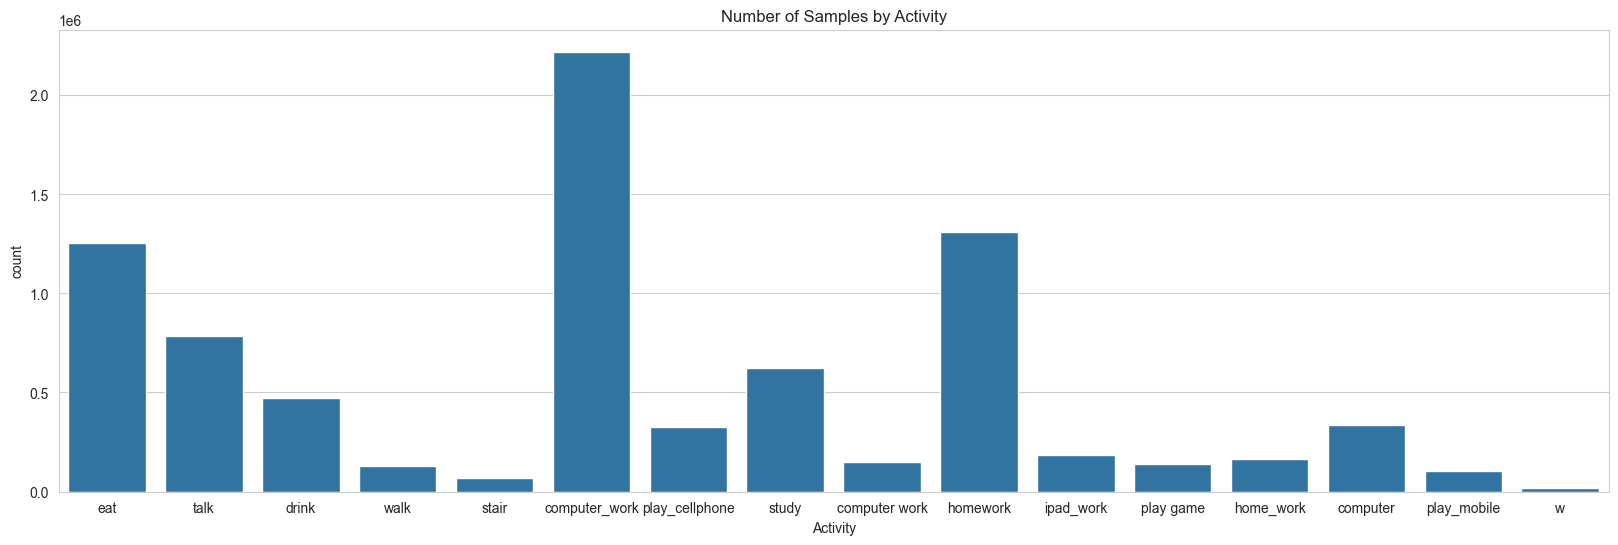

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.countplot(x='Activity', data=cumulative_dataset)
plt.title('Number of Samples by Activity')
plt.show()


In [ ]:
# Consolidate and unify activity labels
label_mapping = {
    'computer_work': 'computer',
    'play_cellphone': 'computer',
    'ipad_work': 'computer',
    'computer': 'computer',
    'study': 'study',
    'homework': 'study',
    'home_work': 'study'
}

# Additional label mapping for "Others"
# We'll add any other labels that aren't "computer", "study", "eat", "talk", "drink", "walk", or "stair"
cumulative_dataset['Activity'] = cumulative_dataset['Activity'].replace(label_mapping)

# Define the main activity categories that will stay as they are
main_activities = {'computer', 'study', 'eat', 'talk', 'drink', 'walk', 'stair'}

# Any label not in main_activities will be categorized as "Others"
cumulative_dataset['Activity'] = cumulative_dataset['Activity'].apply(
    lambda x: x if x in main_activities else 'Others'
)

# Verify updated label distribution
# print(cumulative_dataset['Activity'].value_counts())


Activity
computer    3060863
study       2098190
eat         1255201
talk         786912
drink        470496
Others       410604
walk         128328
stair         66576
Name: count, dtype: int64


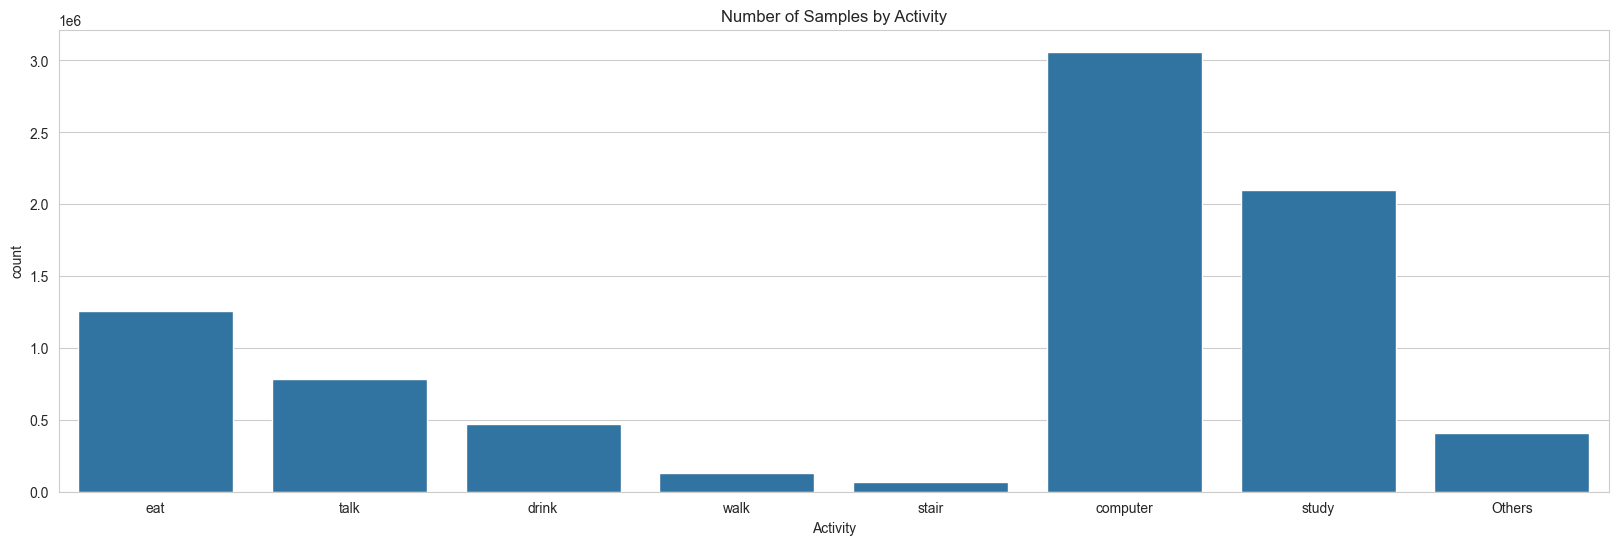

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 6))
sns.countplot(x='Activity', data=cumulative_dataset)
plt.title('Number of Samples by Activity')
plt.show()


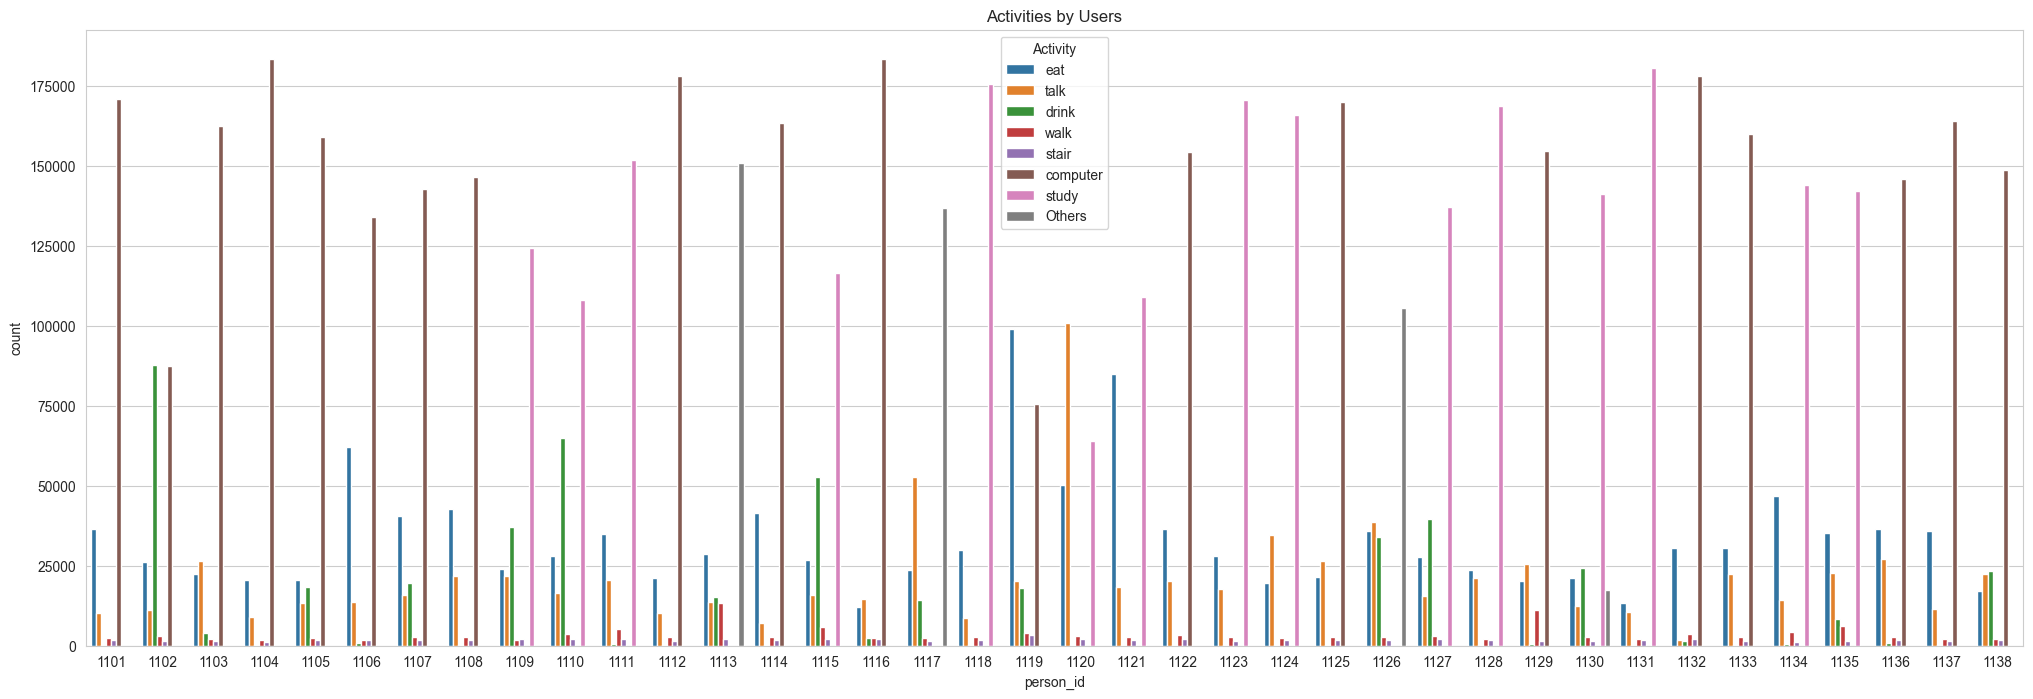

In [ ]:
plt.figure(figsize=(25, 8))
sns.countplot(x='person_id', hue='Activity', data=cumulative_dataset)
plt.title('Activities by Users')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style for plots
sns.set_style("whitegrid")

# Define specific person and activity to visualize
specific_user = 1110
activity = 'eat'

# Filter dataset for the specific user, activity, and sensors
data_activity = cumulative_dataset[
    (cumulative_dataset['person_id'] == specific_user) & 
    (cumulative_dataset['Activity'] == activity) & 
    (cumulative_dataset['Sensor'].isin(['MPL Gyroscope', 'MPL Accelerometer']))
]

# Take the first 1000 data points for visualization
data_activity = data_activity

# Print description of the filtered data
print(data_activity.describe())

# Create separate plots for each sensor
sensors = data_activity['Sensor'].unique()
for sensor in sensors:
    sensor_data = data_activity[data_activity['Sensor'] == sensor]
    
    plt.figure(figsize=(15, 6))
    sns.lineplot(x='timestamp', y='Value1', data=sensor_data, label='Value1 (x-axis)')
    sns.lineplot(x='timestamp', y='Value2', data=sensor_data, label='Value2 (y-axis)')
    sns.lineplot(x='timestamp', y='Value3', data=sensor_data, label='Value3 (z-axis)')
    
    # Customize plot
    plt.legend(loc="upper right")
    plt.ylabel('Signal Values')
    plt.title(f'{activity.capitalize()} - {sensor} Signal Values Over Time for User {specific_user}')
    plt.xticks(rotation=45)
    plt.show()


NameError: name 'cumulative_dataset' is not defined

                           timestamp       Value1       Value2       Value3  \
count                           5440  5440.000000  5440.000000  5440.000000   
mean   2014-08-06 16:15:30.485735424     0.048515     2.311558     0.883786   
min       2014-08-06 16:05:53.600000   -10.618194   -31.629786   -10.916927   
25%    2014-08-06 16:08:09.550000128    -0.539892    -0.007265    -0.786795   
50%       2014-08-06 16:10:25.500000    -0.013982     0.795735     0.004922   
75%    2014-08-06 16:24:36.849999872     0.107611     9.148347     1.004368   
max       2014-08-06 16:26:52.800000    19.420755    12.885593    27.629578   
std                              NaN     1.801703     7.493877     4.446080   

       person_id  
count     5440.0  
mean      1110.0  
min       1110.0  
25%       1110.0  
50%       1110.0  
75%       1110.0  
max       1110.0  
std          0.0  


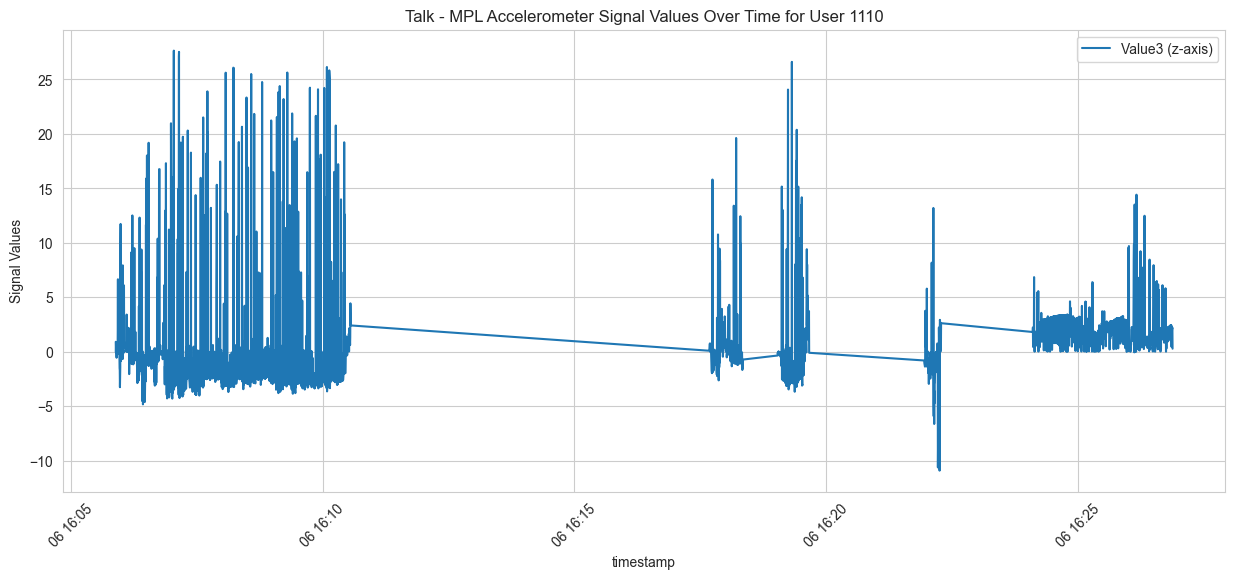

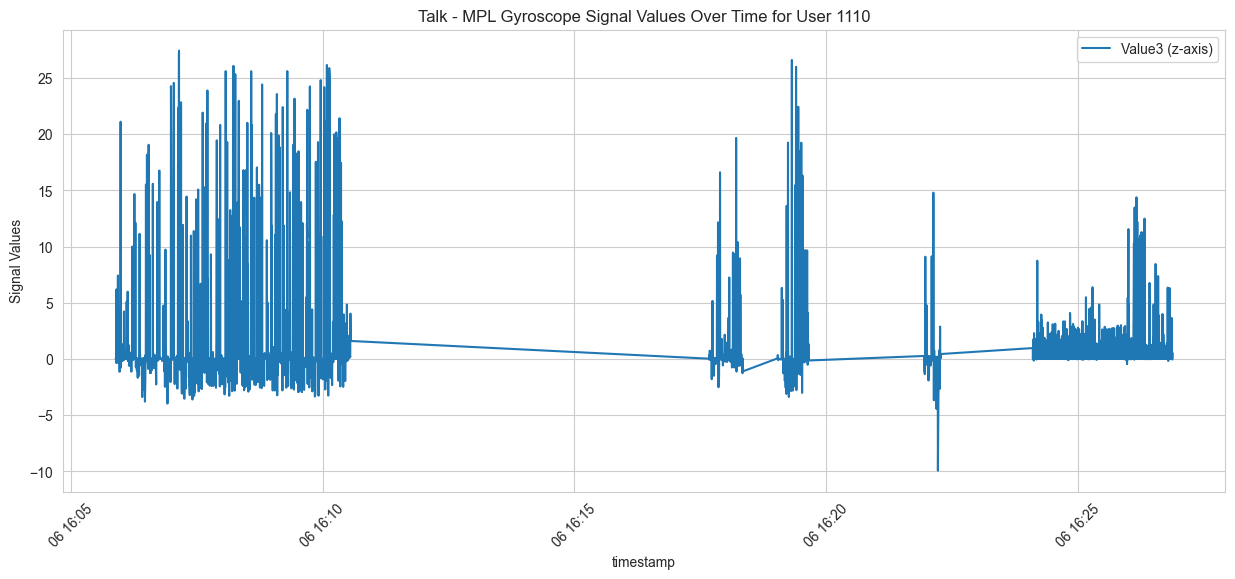

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up Seaborn style for plots
sns.set_style("whitegrid")

# Define specific person and activity to visualize
specific_user = 1110
activity = 'talk'

# Filter dataset for the specific user, activity, and sensors
data_activity = cumulative_dataset[
    (cumulative_dataset['person_id'] == specific_user) & 
    (cumulative_dataset['Activity'] == activity) & 
    (cumulative_dataset['Sensor'].isin(['MPL Gyroscope', 'MPL Accelerometer']))
]

# Take the first 1000 data points for visualization
data_activity = data_activity

# Print description of the filtered data
print(data_activity.describe())

# Create separate plots for each sensor
sensors = data_activity['Sensor'].unique()
for sensor in sensors:
    sensor_data = data_activity[data_activity['Sensor'] == sensor]
    
    plt.figure(figsize=(15, 6))
    # sns.lineplot(x='timestamp', y='Value1', data=sensor_data, label='Value1 (x-axis)')
    # sns.lineplot(x='timestamp', y='Value2', data=sensor_data, label='Value2 (y-axis)')
    sns.lineplot(x='timestamp', y='Value3', data=sensor_data, label='Value3 (z-axis)')
    
    # Customize plot
    plt.legend(loc="upper right")
    plt.ylabel('Signal Values')
    plt.title(f'{activity.capitalize()} - {sensor} Signal Values Over Time for User {specific_user}')
    plt.xticks(rotation=45)
    plt.show()
